In [50]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
train = pd.read_parquet('./train.parquet')
test = pd.read_parquet('./test.parquet')
train = train.drop(['road_in_use','vehicle_restricted','height_restricted'],axis=1)
test = test.drop(['road_in_use','vehicle_restricted','height_restricted'],axis=1)

<AxesSubplot:>

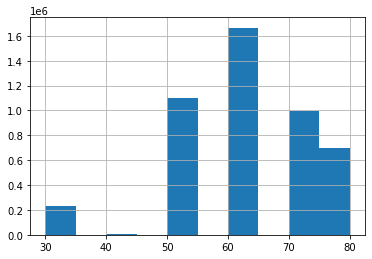

In [35]:
train['maximum_speed_limit'].hist()

In [52]:
train["maximum_speed_limit"].value_counts()

60.0    1665573
50.0    1103682
70.0     995077
80.0     700334
30.0     229761
40.0       6790
Name: maximum_speed_limit, dtype: int64

<AxesSubplot:>

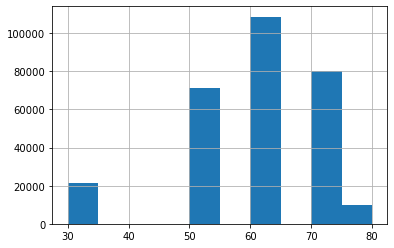

In [36]:
test['maximum_speed_limit'].hist()

In [51]:
test["maximum_speed_limit"].value_counts()

60.0    108606
70.0     80356
50.0     71315
30.0     21350
80.0      9614
Name: maximum_speed_limit, dtype: int64

In [38]:
train[train['maximum_speed_limit']==80]

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
19,TRAIN_0000019,20220210,목,12,2,103,일반국도12호선,0,0,80.0,...,0,오조한도교입구,33.465318,126.908612,없음,송내교차로,33.470372,126.902793,없음,46.0
21,TRAIN_0000021,20220119,수,0,2,103,일반국도12호선,0,0,80.0,...,0,동부장의운수사,33.278168,126.667651,없음,농업용관정,33.279883,126.685954,없음,70.0
30,TRAIN_0000030,20220623,목,6,2,107,-,0,0,80.0,...,0,일호유리,33.472276,126.418443,없음,상귀교차로,33.473390,126.409129,없음,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701201,TRAIN_4701201,20211226,일,3,2,103,일반국도12호선,0,0,80.0,...,3,봉천2교,33.481164,126.399447,없음,봉천2교,33.481324,126.399747,없음,31.0
4701202,TRAIN_4701202,20211012,화,23,2,107,-,0,0,80.0,...,0,진은교차로,33.284189,126.723306,없음,하나로교,33.284439,126.724447,없음,63.0
4701208,TRAIN_4701208,20220323,수,19,2,107,-,0,0,80.0,...,3,제2태흥교,33.287356,126.736525,없음,제2태흥교,33.287582,126.737512,없음,61.0
4701213,TRAIN_4701213,20220331,목,2,2,107,-,0,0,80.0,...,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0


In [2]:
def make_submission(pred):
    sample_submission = pd.read_csv('./submit.csv')
    sample_submission['target'] = pred
    sample_submission.to_csv("./submit.csv", index = False)
    print('save success')

In [3]:
train.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


In [43]:
from sklearn.preprocessing import LabelEncoder
str_col = ["base_date","base_hour","day_of_week","lane_count","road_rating","multi_linked","connect_code"
           ,"weight_restricted","road_type","start_latitude","start_longitude","start_turn_restricted",
          "end_turn_restricted","road_name","start_node_name","end_node_name",'end_latitude','end_longitude'] # "maximum_speed_limit"
for i in str_col:
    le = LabelEncoder()
    le=le.fit(train[i])
    train[i]=le.transform(train[i])
    
    for label in np.unique(test[i]):
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test[i]=le.transform(test[i])

In [33]:
# col = ['lane_count','multi_linked',
#                          'connect_code','end_turn_restricted',
#                          'weight_restricted','road_type']
# pca_target = train.loc[:,col]
# from sklearn.decomposition import PCA
# pca = PCA(n_components=4)
# x = pca.fit_transform(pca_target)

In [34]:
# sum(pca.explained_variance_ratio_)


0.997250330711608

In [35]:
# col = ['lane_count','multi_linked',
#                          'connect_code','end_turn_restricted',
#                          'weight_restricted','road_type']
# pca_target = test.loc[:,col]
# from sklearn.decomposition import PCA
# pca = PCA(n_components=4)
# y = pca.fit_transform(pca_target)

In [47]:
train = train[train["maximum_speed_limit"]==80]
y_train = train['target'] 
X_train = train.drop(['id', 'target'], axis=1)
# X_train = X_train.drop(col, axis=1)
# # X_train['pca1'] = x
# pca_train = pd.DataFrame(x)
# X_train = pd.concat([pca_train,X_train],axis=1)

test = test[test["maximum_speed_limit"]==80]
test = test.drop(['id'], axis=1)
# test = test.drop(col, axis=1)
# # test['pca'] = y
# pca_test = pd.DataFrame(y)
# test = pd.concat([pca_test,test],axis=1)

print(X_train.shape)
print(y_train.shape)
print(test.shape)

(700334, 19)
(700334,)
(9614, 19)


In [48]:
X_train,X_test,y_train,y_test = train_test_split(
    X_train,y_train,test_size=0.1,random_state=10
)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# parms = {'n_estimators':[],'max_depth':[],'min_samples_split':[],'min_samples_leaf':[]}
parms = {'n_estimators':list(range(100,150,10)), # num of iter : using classifier
         'max_depth':list(range(5,11,5)),
         'min_samples_split':[2],
         # 'learning_rate': [0.1], # invalid ?
         'min_samples_leaf':[2]}
rf_clf = RandomForestRegressor(random_state=56,n_jobs=-1) # n_jobs ?
grid_cv = GridSearchCV(rf_clf,param_grid=parms,cv=5,n_jobs=-1,scoring=mean_absolute_error)
grid_cv.fit(X_train,y_train)
print(grid_cv.best_params_)
print(round(grid_cv.best_score_,4))

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# parms = {'n_estimators':[],'max_depth':[],'min_samples_split':[],'min_samples_leaf':[]}
parms = {'n_estimators':[100],'max_depth':list(range(15,21,5))} # num of iter : using classifier
         # 'max_depth':list(range(5,11,5)),
         # 'min_samples_split':[2],
         # 'learning_rate': [0.1], # invalid ?
         # 'min_samples_leaf':[2]}
rf_clf = RandomForestRegressor(random_state=10,n_jobs=-1,verbose=True) # n_jobs ?
grid_cv = GridSearchCV(rf_clf,param_grid=parms,cv=5,n_jobs=-1,scoring='neg_mean_absolute_error')# ,param_grid=parms
grid_cv.fit(X_train,y_train)

print(grid_cv.best_estimator_)
print(grid_cv.best_params_)
print(round(grid_cv.best_score_,4))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.8min


{'max_depth': 15, 'n_estimators': 100}
-3.6195


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  7.1min finished


In [9]:
grid_cv.cv_results_

{'mean_fit_time': array([1180.46939774, 2002.56504316, 1988.57240567]),
 'std_fit_time': array([  2.71724704, 106.16420407, 348.87511226]),
 'mean_score_time': array([ 8.48881302, 16.40960941,  9.26142616]),
 'std_score_time': array([0.29583034, 2.39016288, 4.36128423]),
 'param_max_depth': masked_array(data=[5, 10, 15],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 100, 100],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 5, 'n_estimators': 100},
  {'max_depth': 10, 'n_estimators': 100},
  {'max_depth': 15, 'n_estimators': 100}],
 'split0_test_score': array([-7.77475336, -5.16385334, -3.59830439]),
 'split1_test_score': array([-7.78219226, -5.17155851, -3.59868146]),
 'split2_test_score': array([-7.79659897, -5.23691554, -3.63024948]),
 'split3_test_score': array([-7.77482834, -5.21208539, -3.62753192]),
 'split4_test_s

In [33]:
make_submission(grid_cv.best_estimator_.predict(test))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished


save success


In [49]:
from sklearn.ensemble import RandomForestRegressor
tp = RandomForestRegressor(random_state=56)
tp.fit(X_train,y_train)
pred = tp.predict(X_test)
mae = mean_absolute_error(pred,y_test)
print(mae)

2.458636233829283


In [41]:
make_submission(tp.predict(test))

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


save success


In [6]:
import catboost
cat = catboost.CatBoostRegressor(random_state=56,iterations=10000)
cat.fit(X_train,y_train)
pred = cat.predict(X_test)
mae = mean_absolute_error(pred,y_test)
print(mae)

Learning rate set to 0.023559
0:	learn: 15.7438135	total: 346ms	remaining: 57m 36s
1:	learn: 15.5400735	total: 535ms	remaining: 44m 36s
2:	learn: 15.3451118	total: 729ms	remaining: 40m 27s
3:	learn: 15.1553988	total: 929ms	remaining: 38m 40s
4:	learn: 14.9717986	total: 1.12s	remaining: 37m 23s
5:	learn: 14.7953312	total: 1.32s	remaining: 36m 46s
6:	learn: 14.6250788	total: 1.52s	remaining: 36m 7s
7:	learn: 14.4603624	total: 1.71s	remaining: 35m 39s
8:	learn: 14.3007852	total: 1.9s	remaining: 35m 9s
9:	learn: 14.1465871	total: 2.09s	remaining: 34m 52s
10:	learn: 13.9983659	total: 2.29s	remaining: 34m 39s
11:	learn: 13.8540120	total: 2.48s	remaining: 34m 25s
12:	learn: 13.7155529	total: 2.68s	remaining: 34m 20s
13:	learn: 13.5790716	total: 2.88s	remaining: 34m 15s
14:	learn: 13.4504501	total: 3.09s	remaining: 34m 15s
15:	learn: 13.3235422	total: 3.29s	remaining: 34m 12s
16:	learn: 13.2042321	total: 3.48s	remaining: 34m 3s
17:	learn: 13.0892101	total: 3.66s	remaining: 33m 49s
18:	learn: 1

154:	learn: 8.7690889	total: 30s	remaining: 31m 46s
155:	learn: 8.7617114	total: 30.2s	remaining: 31m 45s
156:	learn: 8.7559086	total: 30.4s	remaining: 31m 44s
157:	learn: 8.7473244	total: 30.6s	remaining: 31m 43s
158:	learn: 8.7365618	total: 30.8s	remaining: 31m 44s
159:	learn: 8.7293000	total: 31s	remaining: 31m 45s
160:	learn: 8.7226484	total: 31.2s	remaining: 31m 46s
161:	learn: 8.7091370	total: 31.4s	remaining: 31m 47s
162:	learn: 8.7019510	total: 31.6s	remaining: 31m 47s
163:	learn: 8.6950928	total: 31.8s	remaining: 31m 48s
164:	learn: 8.6849284	total: 32s	remaining: 31m 48s
165:	learn: 8.6767335	total: 32.2s	remaining: 31m 48s
166:	learn: 8.6694949	total: 32.4s	remaining: 31m 46s
167:	learn: 8.6632749	total: 32.6s	remaining: 31m 45s
168:	learn: 8.6528267	total: 32.8s	remaining: 31m 47s
169:	learn: 8.6449858	total: 33s	remaining: 31m 47s
170:	learn: 8.6365078	total: 33.2s	remaining: 31m 46s
171:	learn: 8.6245487	total: 33.4s	remaining: 31m 46s
172:	learn: 8.6166461	total: 33.6s	r

308:	learn: 7.8432583	total: 59.8s	remaining: 31m 14s
309:	learn: 7.8398940	total: 59.9s	remaining: 31m 13s
310:	learn: 7.8367993	total: 1m	remaining: 31m 12s
311:	learn: 7.8336745	total: 1m	remaining: 31m 12s
312:	learn: 7.8304324	total: 1m	remaining: 31m 11s
313:	learn: 7.8271684	total: 1m	remaining: 31m 10s
314:	learn: 7.8248132	total: 1m	remaining: 31m 11s
315:	learn: 7.8208724	total: 1m 1s	remaining: 31m 10s
316:	learn: 7.8181686	total: 1m 1s	remaining: 31m 10s
317:	learn: 7.8131657	total: 1m 1s	remaining: 31m 11s
318:	learn: 7.8109759	total: 1m 1s	remaining: 31m 11s
319:	learn: 7.8075591	total: 1m 1s	remaining: 31m 10s
320:	learn: 7.8032978	total: 1m 2s	remaining: 31m 10s
321:	learn: 7.7992693	total: 1m 2s	remaining: 31m 10s
322:	learn: 7.7937979	total: 1m 2s	remaining: 31m 10s
323:	learn: 7.7909876	total: 1m 2s	remaining: 31m 10s
324:	learn: 7.7876565	total: 1m 2s	remaining: 31m 10s
325:	learn: 7.7839087	total: 1m 3s	remaining: 31m 10s
326:	learn: 7.7775480	total: 1m 3s	remainin

459:	learn: 7.3705681	total: 1m 28s	remaining: 30m 32s
460:	learn: 7.3670104	total: 1m 28s	remaining: 30m 32s
461:	learn: 7.3645652	total: 1m 28s	remaining: 30m 31s
462:	learn: 7.3598933	total: 1m 28s	remaining: 30m 32s
463:	learn: 7.3574781	total: 1m 29s	remaining: 30m 31s
464:	learn: 7.3549909	total: 1m 29s	remaining: 30m 31s
465:	learn: 7.3529800	total: 1m 29s	remaining: 30m 30s
466:	learn: 7.3514936	total: 1m 29s	remaining: 30m 30s
467:	learn: 7.3485085	total: 1m 29s	remaining: 30m 30s
468:	learn: 7.3464585	total: 1m 30s	remaining: 30m 30s
469:	learn: 7.3442853	total: 1m 30s	remaining: 30m 29s
470:	learn: 7.3419439	total: 1m 30s	remaining: 30m 29s
471:	learn: 7.3385359	total: 1m 30s	remaining: 30m 29s
472:	learn: 7.3360150	total: 1m 30s	remaining: 30m 28s
473:	learn: 7.3327348	total: 1m 31s	remaining: 30m 28s
474:	learn: 7.3305840	total: 1m 31s	remaining: 30m 28s
475:	learn: 7.3293602	total: 1m 31s	remaining: 30m 28s
476:	learn: 7.3263818	total: 1m 31s	remaining: 30m 27s
477:	learn

610:	learn: 7.0429680	total: 1m 57s	remaining: 30m
611:	learn: 7.0411853	total: 1m 57s	remaining: 30m
612:	learn: 7.0393784	total: 1m 57s	remaining: 29m 59s
613:	learn: 7.0366457	total: 1m 57s	remaining: 29m 59s
614:	learn: 7.0352114	total: 1m 57s	remaining: 29m 59s
615:	learn: 7.0325999	total: 1m 58s	remaining: 29m 59s
616:	learn: 7.0299555	total: 1m 58s	remaining: 29m 59s
617:	learn: 7.0288601	total: 1m 58s	remaining: 29m 59s
618:	learn: 7.0267766	total: 1m 58s	remaining: 29m 58s
619:	learn: 7.0245802	total: 1m 58s	remaining: 29m 58s
620:	learn: 7.0215392	total: 1m 59s	remaining: 29m 58s
621:	learn: 7.0198219	total: 1m 59s	remaining: 29m 58s
622:	learn: 7.0175331	total: 1m 59s	remaining: 29m 58s
623:	learn: 7.0145315	total: 1m 59s	remaining: 29m 58s
624:	learn: 7.0123394	total: 1m 59s	remaining: 29m 58s
625:	learn: 7.0103160	total: 2m	remaining: 29m 58s
626:	learn: 7.0081856	total: 2m	remaining: 29m 57s
627:	learn: 7.0061971	total: 2m	remaining: 29m 57s
628:	learn: 7.0041622	total: 2

762:	learn: 6.7896006	total: 2m 26s	remaining: 29m 31s
763:	learn: 6.7874699	total: 2m 26s	remaining: 29m 31s
764:	learn: 6.7864952	total: 2m 26s	remaining: 29m 31s
765:	learn: 6.7847421	total: 2m 26s	remaining: 29m 31s
766:	learn: 6.7831317	total: 2m 27s	remaining: 29m 31s
767:	learn: 6.7820719	total: 2m 27s	remaining: 29m 30s
768:	learn: 6.7808012	total: 2m 27s	remaining: 29m 30s
769:	learn: 6.7791550	total: 2m 27s	remaining: 29m 30s
770:	learn: 6.7778075	total: 2m 27s	remaining: 29m 30s
771:	learn: 6.7762780	total: 2m 28s	remaining: 29m 30s
772:	learn: 6.7746385	total: 2m 28s	remaining: 29m 29s
773:	learn: 6.7728290	total: 2m 28s	remaining: 29m 29s
774:	learn: 6.7712974	total: 2m 28s	remaining: 29m 29s
775:	learn: 6.7702692	total: 2m 28s	remaining: 29m 29s
776:	learn: 6.7693161	total: 2m 29s	remaining: 29m 28s
777:	learn: 6.7680039	total: 2m 29s	remaining: 29m 28s
778:	learn: 6.7648294	total: 2m 29s	remaining: 29m 28s
779:	learn: 6.7637285	total: 2m 29s	remaining: 29m 28s
780:	learn

913:	learn: 6.5845087	total: 2m 55s	remaining: 29m 8s
914:	learn: 6.5836740	total: 2m 56s	remaining: 29m 8s
915:	learn: 6.5824800	total: 2m 56s	remaining: 29m 8s
916:	learn: 6.5804405	total: 2m 56s	remaining: 29m 8s
917:	learn: 6.5789310	total: 2m 56s	remaining: 29m 8s
918:	learn: 6.5779438	total: 2m 56s	remaining: 29m 8s
919:	learn: 6.5771455	total: 2m 57s	remaining: 29m 7s
920:	learn: 6.5763712	total: 2m 57s	remaining: 29m 7s
921:	learn: 6.5749238	total: 2m 57s	remaining: 29m 7s
922:	learn: 6.5738524	total: 2m 57s	remaining: 29m 7s
923:	learn: 6.5722964	total: 2m 57s	remaining: 29m 7s
924:	learn: 6.5710340	total: 2m 58s	remaining: 29m 7s
925:	learn: 6.5703271	total: 2m 58s	remaining: 29m 7s
926:	learn: 6.5693082	total: 2m 58s	remaining: 29m 6s
927:	learn: 6.5681563	total: 2m 58s	remaining: 29m 6s
928:	learn: 6.5674516	total: 2m 58s	remaining: 29m 6s
929:	learn: 6.5661119	total: 2m 59s	remaining: 29m 6s
930:	learn: 6.5652864	total: 2m 59s	remaining: 29m 6s
931:	learn: 6.5643277	total:

1064:	learn: 6.4182045	total: 3m 25s	remaining: 28m 45s
1065:	learn: 6.4169528	total: 3m 25s	remaining: 28m 44s
1066:	learn: 6.4164927	total: 3m 25s	remaining: 28m 44s
1067:	learn: 6.4148254	total: 3m 26s	remaining: 28m 44s
1068:	learn: 6.4136593	total: 3m 26s	remaining: 28m 44s
1069:	learn: 6.4123901	total: 3m 26s	remaining: 28m 43s
1070:	learn: 6.4109616	total: 3m 26s	remaining: 28m 43s
1071:	learn: 6.4092795	total: 3m 26s	remaining: 28m 43s
1072:	learn: 6.4085488	total: 3m 27s	remaining: 28m 43s
1073:	learn: 6.4079037	total: 3m 27s	remaining: 28m 43s
1074:	learn: 6.4071114	total: 3m 27s	remaining: 28m 42s
1075:	learn: 6.4054191	total: 3m 27s	remaining: 28m 42s
1076:	learn: 6.4044019	total: 3m 27s	remaining: 28m 42s
1077:	learn: 6.4035379	total: 3m 28s	remaining: 28m 42s
1078:	learn: 6.4026191	total: 3m 28s	remaining: 28m 42s
1079:	learn: 6.4011105	total: 3m 28s	remaining: 28m 41s
1080:	learn: 6.3999921	total: 3m 28s	remaining: 28m 41s
1081:	learn: 6.3985719	total: 3m 28s	remaining: 

1211:	learn: 6.2683617	total: 3m 54s	remaining: 28m 19s
1212:	learn: 6.2674155	total: 3m 54s	remaining: 28m 19s
1213:	learn: 6.2663682	total: 3m 54s	remaining: 28m 19s
1214:	learn: 6.2656378	total: 3m 55s	remaining: 28m 19s
1215:	learn: 6.2649378	total: 3m 55s	remaining: 28m 19s
1216:	learn: 6.2640275	total: 3m 55s	remaining: 28m 18s
1217:	learn: 6.2632748	total: 3m 55s	remaining: 28m 18s
1218:	learn: 6.2626892	total: 3m 55s	remaining: 28m 18s
1219:	learn: 6.2621627	total: 3m 55s	remaining: 28m 18s
1220:	learn: 6.2615125	total: 3m 56s	remaining: 28m 17s
1221:	learn: 6.2606030	total: 3m 56s	remaining: 28m 17s
1222:	learn: 6.2599361	total: 3m 56s	remaining: 28m 17s
1223:	learn: 6.2593578	total: 3m 56s	remaining: 28m 17s
1224:	learn: 6.2586736	total: 3m 56s	remaining: 28m 17s
1225:	learn: 6.2580420	total: 3m 57s	remaining: 28m 17s
1226:	learn: 6.2571902	total: 3m 57s	remaining: 28m 16s
1227:	learn: 6.2565302	total: 3m 57s	remaining: 28m 16s
1228:	learn: 6.2559774	total: 3m 57s	remaining: 

1361:	learn: 6.1520378	total: 4m 23s	remaining: 27m 51s
1362:	learn: 6.1514437	total: 4m 23s	remaining: 27m 51s
1363:	learn: 6.1507639	total: 4m 23s	remaining: 27m 51s
1364:	learn: 6.1499193	total: 4m 24s	remaining: 27m 50s
1365:	learn: 6.1493130	total: 4m 24s	remaining: 27m 50s
1366:	learn: 6.1478400	total: 4m 24s	remaining: 27m 50s
1367:	learn: 6.1472468	total: 4m 24s	remaining: 27m 50s
1368:	learn: 6.1468530	total: 4m 24s	remaining: 27m 50s
1369:	learn: 6.1457776	total: 4m 25s	remaining: 27m 49s
1370:	learn: 6.1450704	total: 4m 25s	remaining: 27m 49s
1371:	learn: 6.1444719	total: 4m 25s	remaining: 27m 49s
1372:	learn: 6.1440240	total: 4m 25s	remaining: 27m 49s
1373:	learn: 6.1433394	total: 4m 25s	remaining: 27m 49s
1374:	learn: 6.1427072	total: 4m 26s	remaining: 27m 49s
1375:	learn: 6.1415047	total: 4m 26s	remaining: 27m 49s
1376:	learn: 6.1407731	total: 4m 26s	remaining: 27m 48s
1377:	learn: 6.1394062	total: 4m 26s	remaining: 27m 48s
1378:	learn: 6.1389873	total: 4m 26s	remaining: 

1508:	learn: 6.0474348	total: 4m 53s	remaining: 27m 28s
1509:	learn: 6.0468015	total: 4m 53s	remaining: 27m 28s
1510:	learn: 6.0461907	total: 4m 53s	remaining: 27m 28s
1511:	learn: 6.0450234	total: 4m 53s	remaining: 27m 28s
1512:	learn: 6.0446122	total: 4m 53s	remaining: 27m 28s
1513:	learn: 6.0440248	total: 4m 54s	remaining: 27m 28s
1514:	learn: 6.0432778	total: 4m 54s	remaining: 27m 27s
1515:	learn: 6.0425136	total: 4m 54s	remaining: 27m 27s
1516:	learn: 6.0419328	total: 4m 54s	remaining: 27m 27s
1517:	learn: 6.0414268	total: 4m 54s	remaining: 27m 27s
1518:	learn: 6.0408185	total: 4m 55s	remaining: 27m 27s
1519:	learn: 6.0400554	total: 4m 55s	remaining: 27m 27s
1520:	learn: 6.0395360	total: 4m 55s	remaining: 27m 26s
1521:	learn: 6.0390793	total: 4m 55s	remaining: 27m 26s
1522:	learn: 6.0386589	total: 4m 55s	remaining: 27m 26s
1523:	learn: 6.0383451	total: 4m 55s	remaining: 27m 26s
1524:	learn: 6.0378754	total: 4m 56s	remaining: 27m 26s
1525:	learn: 6.0373194	total: 4m 56s	remaining: 

1657:	learn: 5.9601939	total: 5m 22s	remaining: 27m
1658:	learn: 5.9595968	total: 5m 22s	remaining: 27m
1659:	learn: 5.9592433	total: 5m 22s	remaining: 27m
1660:	learn: 5.9589744	total: 5m 22s	remaining: 27m
1661:	learn: 5.9586388	total: 5m 22s	remaining: 27m
1662:	learn: 5.9582484	total: 5m 23s	remaining: 26m 59s
1663:	learn: 5.9577403	total: 5m 23s	remaining: 26m 59s
1664:	learn: 5.9570070	total: 5m 23s	remaining: 26m 59s
1665:	learn: 5.9565215	total: 5m 23s	remaining: 26m 59s
1666:	learn: 5.9559266	total: 5m 23s	remaining: 26m 59s
1667:	learn: 5.9551132	total: 5m 24s	remaining: 26m 58s
1668:	learn: 5.9546774	total: 5m 24s	remaining: 26m 58s
1669:	learn: 5.9543882	total: 5m 24s	remaining: 26m 58s
1670:	learn: 5.9538666	total: 5m 24s	remaining: 26m 58s
1671:	learn: 5.9534960	total: 5m 24s	remaining: 26m 57s
1672:	learn: 5.9529165	total: 5m 25s	remaining: 26m 57s
1673:	learn: 5.9524157	total: 5m 25s	remaining: 26m 57s
1674:	learn: 5.9517867	total: 5m 25s	remaining: 26m 57s
1675:	learn:

1805:	learn: 5.8766111	total: 5m 51s	remaining: 26m 32s
1806:	learn: 5.8761619	total: 5m 51s	remaining: 26m 32s
1807:	learn: 5.8753211	total: 5m 51s	remaining: 26m 32s
1808:	learn: 5.8749550	total: 5m 51s	remaining: 26m 32s
1809:	learn: 5.8744605	total: 5m 51s	remaining: 26m 32s
1810:	learn: 5.8736875	total: 5m 52s	remaining: 26m 32s
1811:	learn: 5.8729839	total: 5m 52s	remaining: 26m 32s
1812:	learn: 5.8722561	total: 5m 52s	remaining: 26m 32s
1813:	learn: 5.8718039	total: 5m 52s	remaining: 26m 31s
1814:	learn: 5.8713336	total: 5m 52s	remaining: 26m 31s
1815:	learn: 5.8710519	total: 5m 53s	remaining: 26m 31s
1816:	learn: 5.8705613	total: 5m 53s	remaining: 26m 31s
1817:	learn: 5.8698584	total: 5m 53s	remaining: 26m 31s
1818:	learn: 5.8695652	total: 5m 53s	remaining: 26m 31s
1819:	learn: 5.8688628	total: 5m 53s	remaining: 26m 30s
1820:	learn: 5.8682629	total: 5m 54s	remaining: 26m 30s
1821:	learn: 5.8670830	total: 5m 54s	remaining: 26m 30s
1822:	learn: 5.8663496	total: 5m 54s	remaining: 

1954:	learn: 5.7996815	total: 6m 20s	remaining: 26m 4s
1955:	learn: 5.7991731	total: 6m 20s	remaining: 26m 4s
1956:	learn: 5.7983808	total: 6m 20s	remaining: 26m 4s
1957:	learn: 5.7979477	total: 6m 20s	remaining: 26m 4s
1958:	learn: 5.7973591	total: 6m 21s	remaining: 26m 3s
1959:	learn: 5.7968533	total: 6m 21s	remaining: 26m 3s
1960:	learn: 5.7963214	total: 6m 21s	remaining: 26m 3s
1961:	learn: 5.7957221	total: 6m 21s	remaining: 26m 3s
1962:	learn: 5.7949487	total: 6m 21s	remaining: 26m 3s
1963:	learn: 5.7947776	total: 6m 21s	remaining: 26m 2s
1964:	learn: 5.7943571	total: 6m 22s	remaining: 26m 2s
1965:	learn: 5.7939946	total: 6m 22s	remaining: 26m 2s
1966:	learn: 5.7935917	total: 6m 22s	remaining: 26m 2s
1967:	learn: 5.7928210	total: 6m 22s	remaining: 26m 2s
1968:	learn: 5.7923560	total: 6m 22s	remaining: 26m 2s
1969:	learn: 5.7918341	total: 6m 23s	remaining: 26m 1s
1970:	learn: 5.7914346	total: 6m 23s	remaining: 26m 1s
1971:	learn: 5.7910903	total: 6m 23s	remaining: 26m 1s
1972:	lear

2102:	learn: 5.7332522	total: 6m 49s	remaining: 25m 37s
2103:	learn: 5.7328402	total: 6m 49s	remaining: 25m 37s
2104:	learn: 5.7325556	total: 6m 49s	remaining: 25m 37s
2105:	learn: 5.7322703	total: 6m 50s	remaining: 25m 37s
2106:	learn: 5.7319927	total: 6m 50s	remaining: 25m 37s
2107:	learn: 5.7317003	total: 6m 50s	remaining: 25m 36s
2108:	learn: 5.7313533	total: 6m 50s	remaining: 25m 36s
2109:	learn: 5.7309814	total: 6m 50s	remaining: 25m 36s
2110:	learn: 5.7307192	total: 6m 51s	remaining: 25m 36s
2111:	learn: 5.7303113	total: 6m 51s	remaining: 25m 36s
2112:	learn: 5.7300647	total: 6m 51s	remaining: 25m 35s
2113:	learn: 5.7298975	total: 6m 51s	remaining: 25m 35s
2114:	learn: 5.7296500	total: 6m 51s	remaining: 25m 35s
2115:	learn: 5.7293971	total: 6m 52s	remaining: 25m 35s
2116:	learn: 5.7289109	total: 6m 52s	remaining: 25m 34s
2117:	learn: 5.7284501	total: 6m 52s	remaining: 25m 34s
2118:	learn: 5.7280712	total: 6m 52s	remaining: 25m 34s
2119:	learn: 5.7275550	total: 6m 52s	remaining: 

2250:	learn: 5.6777210	total: 7m 18s	remaining: 25m 9s
2251:	learn: 5.6771831	total: 7m 18s	remaining: 25m 9s
2252:	learn: 5.6768615	total: 7m 19s	remaining: 25m 9s
2253:	learn: 5.6764379	total: 7m 19s	remaining: 25m 9s
2254:	learn: 5.6758326	total: 7m 19s	remaining: 25m 9s
2255:	learn: 5.6755193	total: 7m 19s	remaining: 25m 9s
2256:	learn: 5.6750828	total: 7m 19s	remaining: 25m 9s
2257:	learn: 5.6746311	total: 7m 20s	remaining: 25m 8s
2258:	learn: 5.6741640	total: 7m 20s	remaining: 25m 8s
2259:	learn: 5.6738434	total: 7m 20s	remaining: 25m 8s
2260:	learn: 5.6734166	total: 7m 20s	remaining: 25m 8s
2261:	learn: 5.6730799	total: 7m 20s	remaining: 25m 7s
2262:	learn: 5.6727572	total: 7m 21s	remaining: 25m 7s
2263:	learn: 5.6723741	total: 7m 21s	remaining: 25m 7s
2264:	learn: 5.6718264	total: 7m 21s	remaining: 25m 7s
2265:	learn: 5.6715745	total: 7m 21s	remaining: 25m 7s
2266:	learn: 5.6712700	total: 7m 21s	remaining: 25m 7s
2267:	learn: 5.6708428	total: 7m 21s	remaining: 25m 6s
2268:	lear

2399:	learn: 5.6254651	total: 7m 47s	remaining: 24m 41s
2400:	learn: 5.6252518	total: 7m 47s	remaining: 24m 41s
2401:	learn: 5.6250265	total: 7m 48s	remaining: 24m 40s
2402:	learn: 5.6246744	total: 7m 48s	remaining: 24m 40s
2403:	learn: 5.6243180	total: 7m 48s	remaining: 24m 40s
2404:	learn: 5.6240234	total: 7m 48s	remaining: 24m 40s
2405:	learn: 5.6237874	total: 7m 48s	remaining: 24m 40s
2406:	learn: 5.6234011	total: 7m 49s	remaining: 24m 40s
2407:	learn: 5.6231830	total: 7m 49s	remaining: 24m 39s
2408:	learn: 5.6228172	total: 7m 49s	remaining: 24m 39s
2409:	learn: 5.6225375	total: 7m 49s	remaining: 24m 39s
2410:	learn: 5.6219134	total: 7m 50s	remaining: 24m 39s
2411:	learn: 5.6216056	total: 7m 50s	remaining: 24m 39s
2412:	learn: 5.6212437	total: 7m 50s	remaining: 24m 39s
2413:	learn: 5.6209480	total: 7m 50s	remaining: 24m 38s
2414:	learn: 5.6206039	total: 7m 50s	remaining: 24m 38s
2415:	learn: 5.6200349	total: 7m 51s	remaining: 24m 38s
2416:	learn: 5.6193648	total: 7m 51s	remaining: 

2548:	learn: 5.5762803	total: 8m 17s	remaining: 24m 14s
2549:	learn: 5.5757702	total: 8m 17s	remaining: 24m 14s
2550:	learn: 5.5752027	total: 8m 18s	remaining: 24m 14s
2551:	learn: 5.5749899	total: 8m 18s	remaining: 24m 14s
2552:	learn: 5.5744261	total: 8m 18s	remaining: 24m 13s
2553:	learn: 5.5742150	total: 8m 18s	remaining: 24m 13s
2554:	learn: 5.5737085	total: 8m 18s	remaining: 24m 13s
2555:	learn: 5.5734915	total: 8m 19s	remaining: 24m 13s
2556:	learn: 5.5731291	total: 8m 19s	remaining: 24m 13s
2557:	learn: 5.5727043	total: 8m 19s	remaining: 24m 12s
2558:	learn: 5.5724297	total: 8m 19s	remaining: 24m 12s
2559:	learn: 5.5722042	total: 8m 19s	remaining: 24m 12s
2560:	learn: 5.5718546	total: 8m 20s	remaining: 24m 12s
2561:	learn: 5.5713940	total: 8m 20s	remaining: 24m 12s
2562:	learn: 5.5711964	total: 8m 20s	remaining: 24m 11s
2563:	learn: 5.5709457	total: 8m 20s	remaining: 24m 11s
2564:	learn: 5.5706698	total: 8m 20s	remaining: 24m 11s
2565:	learn: 5.5704515	total: 8m 20s	remaining: 

2697:	learn: 5.5316375	total: 8m 46s	remaining: 23m 45s
2698:	learn: 5.5313784	total: 8m 46s	remaining: 23m 45s
2699:	learn: 5.5311220	total: 8m 47s	remaining: 23m 45s
2700:	learn: 5.5308788	total: 8m 47s	remaining: 23m 44s
2701:	learn: 5.5305845	total: 8m 47s	remaining: 23m 44s
2702:	learn: 5.5302745	total: 8m 47s	remaining: 23m 44s
2703:	learn: 5.5300527	total: 8m 47s	remaining: 23m 44s
2704:	learn: 5.5297363	total: 8m 48s	remaining: 23m 44s
2705:	learn: 5.5295855	total: 8m 48s	remaining: 23m 43s
2706:	learn: 5.5292821	total: 8m 48s	remaining: 23m 43s
2707:	learn: 5.5290038	total: 8m 48s	remaining: 23m 43s
2708:	learn: 5.5287474	total: 8m 48s	remaining: 23m 43s
2709:	learn: 5.5284870	total: 8m 49s	remaining: 23m 43s
2710:	learn: 5.5281102	total: 8m 49s	remaining: 23m 42s
2711:	learn: 5.5278937	total: 8m 49s	remaining: 23m 42s
2712:	learn: 5.5277766	total: 8m 49s	remaining: 23m 42s
2713:	learn: 5.5275819	total: 8m 49s	remaining: 23m 42s
2714:	learn: 5.5273607	total: 8m 49s	remaining: 

2845:	learn: 5.4890429	total: 9m 15s	remaining: 23m 16s
2846:	learn: 5.4888846	total: 9m 15s	remaining: 23m 16s
2847:	learn: 5.4886816	total: 9m 16s	remaining: 23m 16s
2848:	learn: 5.4884717	total: 9m 16s	remaining: 23m 16s
2849:	learn: 5.4881488	total: 9m 16s	remaining: 23m 16s
2850:	learn: 5.4878977	total: 9m 16s	remaining: 23m 15s
2851:	learn: 5.4876549	total: 9m 16s	remaining: 23m 15s
2852:	learn: 5.4875104	total: 9m 17s	remaining: 23m 15s
2853:	learn: 5.4872714	total: 9m 17s	remaining: 23m 15s
2854:	learn: 5.4870235	total: 9m 17s	remaining: 23m 15s
2855:	learn: 5.4868003	total: 9m 17s	remaining: 23m 15s
2856:	learn: 5.4866127	total: 9m 17s	remaining: 23m 14s
2857:	learn: 5.4860883	total: 9m 18s	remaining: 23m 14s
2858:	learn: 5.4858830	total: 9m 18s	remaining: 23m 14s
2859:	learn: 5.4855277	total: 9m 18s	remaining: 23m 14s
2860:	learn: 5.4850757	total: 9m 18s	remaining: 23m 14s
2861:	learn: 5.4849355	total: 9m 18s	remaining: 23m 13s
2862:	learn: 5.4845776	total: 9m 19s	remaining: 

2993:	learn: 5.4497711	total: 9m 44s	remaining: 22m 48s
2994:	learn: 5.4496337	total: 9m 44s	remaining: 22m 47s
2995:	learn: 5.4494570	total: 9m 44s	remaining: 22m 47s
2996:	learn: 5.4492113	total: 9m 45s	remaining: 22m 47s
2997:	learn: 5.4490698	total: 9m 45s	remaining: 22m 47s
2998:	learn: 5.4488945	total: 9m 45s	remaining: 22m 46s
2999:	learn: 5.4486599	total: 9m 45s	remaining: 22m 46s
3000:	learn: 5.4483236	total: 9m 45s	remaining: 22m 46s
3001:	learn: 5.4482191	total: 9m 46s	remaining: 22m 46s
3002:	learn: 5.4480916	total: 9m 46s	remaining: 22m 46s
3003:	learn: 5.4478990	total: 9m 46s	remaining: 22m 45s
3004:	learn: 5.4476426	total: 9m 46s	remaining: 22m 45s
3005:	learn: 5.4474863	total: 9m 46s	remaining: 22m 45s
3006:	learn: 5.4472743	total: 9m 47s	remaining: 22m 45s
3007:	learn: 5.4469799	total: 9m 47s	remaining: 22m 45s
3008:	learn: 5.4466601	total: 9m 47s	remaining: 22m 45s
3009:	learn: 5.4465276	total: 9m 47s	remaining: 22m 44s
3010:	learn: 5.4463131	total: 9m 47s	remaining: 

3140:	learn: 5.4139548	total: 10m 13s	remaining: 22m 19s
3141:	learn: 5.4137269	total: 10m 13s	remaining: 22m 19s
3142:	learn: 5.4135257	total: 10m 14s	remaining: 22m 19s
3143:	learn: 5.4134377	total: 10m 14s	remaining: 22m 19s
3144:	learn: 5.4132225	total: 10m 14s	remaining: 22m 19s
3145:	learn: 5.4130078	total: 10m 14s	remaining: 22m 18s
3146:	learn: 5.4127949	total: 10m 14s	remaining: 22m 18s
3147:	learn: 5.4125520	total: 10m 14s	remaining: 22m 18s
3148:	learn: 5.4123344	total: 10m 15s	remaining: 22m 18s
3149:	learn: 5.4121023	total: 10m 15s	remaining: 22m 18s
3150:	learn: 5.4119384	total: 10m 15s	remaining: 22m 17s
3151:	learn: 5.4117048	total: 10m 15s	remaining: 22m 17s
3152:	learn: 5.4114433	total: 10m 15s	remaining: 22m 17s
3153:	learn: 5.4111679	total: 10m 16s	remaining: 22m 17s
3154:	learn: 5.4107415	total: 10m 16s	remaining: 22m 17s
3155:	learn: 5.4106258	total: 10m 16s	remaining: 22m 16s
3156:	learn: 5.4103941	total: 10m 16s	remaining: 22m 16s
3157:	learn: 5.4102172	total: 1

3286:	learn: 5.3828545	total: 10m 42s	remaining: 21m 51s
3287:	learn: 5.3826608	total: 10m 42s	remaining: 21m 51s
3288:	learn: 5.3824062	total: 10m 42s	remaining: 21m 50s
3289:	learn: 5.3821029	total: 10m 42s	remaining: 21m 50s
3290:	learn: 5.3819322	total: 10m 42s	remaining: 21m 50s
3291:	learn: 5.3817999	total: 10m 43s	remaining: 21m 50s
3292:	learn: 5.3815251	total: 10m 43s	remaining: 21m 50s
3293:	learn: 5.3814199	total: 10m 43s	remaining: 21m 49s
3294:	learn: 5.3812767	total: 10m 43s	remaining: 21m 49s
3295:	learn: 5.3810208	total: 10m 43s	remaining: 21m 49s
3296:	learn: 5.3807942	total: 10m 44s	remaining: 21m 49s
3297:	learn: 5.3807009	total: 10m 44s	remaining: 21m 49s
3298:	learn: 5.3805470	total: 10m 44s	remaining: 21m 48s
3299:	learn: 5.3803374	total: 10m 44s	remaining: 21m 48s
3300:	learn: 5.3796066	total: 10m 44s	remaining: 21m 48s
3301:	learn: 5.3792861	total: 10m 44s	remaining: 21m 48s
3302:	learn: 5.3791178	total: 10m 45s	remaining: 21m 48s
3303:	learn: 5.3789222	total: 1

3431:	learn: 5.3530906	total: 11m 10s	remaining: 21m 22s
3432:	learn: 5.3528763	total: 11m 10s	remaining: 21m 22s
3433:	learn: 5.3527980	total: 11m 10s	remaining: 21m 22s
3434:	learn: 5.3526307	total: 11m 10s	remaining: 21m 22s
3435:	learn: 5.3524153	total: 11m 11s	remaining: 21m 21s
3436:	learn: 5.3521370	total: 11m 11s	remaining: 21m 21s
3437:	learn: 5.3519431	total: 11m 11s	remaining: 21m 21s
3438:	learn: 5.3517787	total: 11m 11s	remaining: 21m 21s
3439:	learn: 5.3516583	total: 11m 11s	remaining: 21m 21s
3440:	learn: 5.3515519	total: 11m 11s	remaining: 21m 20s
3441:	learn: 5.3514214	total: 11m 12s	remaining: 21m 20s
3442:	learn: 5.3511045	total: 11m 12s	remaining: 21m 20s
3443:	learn: 5.3509480	total: 11m 12s	remaining: 21m 20s
3444:	learn: 5.3507956	total: 11m 12s	remaining: 21m 19s
3445:	learn: 5.3505908	total: 11m 12s	remaining: 21m 19s
3446:	learn: 5.3503900	total: 11m 13s	remaining: 21m 19s
3447:	learn: 5.3499949	total: 11m 13s	remaining: 21m 19s
3448:	learn: 5.3497960	total: 1

3576:	learn: 5.3235296	total: 11m 38s	remaining: 20m 53s
3577:	learn: 5.3233146	total: 11m 38s	remaining: 20m 53s
3578:	learn: 5.3229891	total: 11m 38s	remaining: 20m 53s
3579:	learn: 5.3226818	total: 11m 38s	remaining: 20m 53s
3580:	learn: 5.3225409	total: 11m 39s	remaining: 20m 52s
3581:	learn: 5.3223171	total: 11m 39s	remaining: 20m 52s
3582:	learn: 5.3221852	total: 11m 39s	remaining: 20m 52s
3583:	learn: 5.3220113	total: 11m 39s	remaining: 20m 52s
3584:	learn: 5.3216845	total: 11m 39s	remaining: 20m 52s
3585:	learn: 5.3215447	total: 11m 40s	remaining: 20m 52s
3586:	learn: 5.3213686	total: 11m 40s	remaining: 20m 51s
3587:	learn: 5.3209392	total: 11m 40s	remaining: 20m 51s
3588:	learn: 5.3206340	total: 11m 40s	remaining: 20m 51s
3589:	learn: 5.3205093	total: 11m 40s	remaining: 20m 51s
3590:	learn: 5.3203244	total: 11m 40s	remaining: 20m 51s
3591:	learn: 5.3201202	total: 11m 41s	remaining: 20m 50s
3592:	learn: 5.3199255	total: 11m 41s	remaining: 20m 50s
3593:	learn: 5.3196789	total: 1

3721:	learn: 5.2971948	total: 12m 6s	remaining: 20m 24s
3722:	learn: 5.2970483	total: 12m 6s	remaining: 20m 24s
3723:	learn: 5.2968353	total: 12m 6s	remaining: 20m 24s
3724:	learn: 5.2967640	total: 12m 6s	remaining: 20m 24s
3725:	learn: 5.2963879	total: 12m 6s	remaining: 20m 23s
3726:	learn: 5.2961428	total: 12m 7s	remaining: 20m 23s
3727:	learn: 5.2959856	total: 12m 7s	remaining: 20m 23s
3728:	learn: 5.2958705	total: 12m 7s	remaining: 20m 23s
3729:	learn: 5.2957943	total: 12m 7s	remaining: 20m 23s
3730:	learn: 5.2955773	total: 12m 7s	remaining: 20m 22s
3731:	learn: 5.2954393	total: 12m 7s	remaining: 20m 22s
3732:	learn: 5.2953453	total: 12m 8s	remaining: 20m 22s
3733:	learn: 5.2951857	total: 12m 8s	remaining: 20m 22s
3734:	learn: 5.2948939	total: 12m 8s	remaining: 20m 22s
3735:	learn: 5.2947587	total: 12m 8s	remaining: 20m 21s
3736:	learn: 5.2946581	total: 12m 8s	remaining: 20m 21s
3737:	learn: 5.2945927	total: 12m 9s	remaining: 20m 21s
3738:	learn: 5.2944297	total: 12m 9s	remaining: 

3867:	learn: 5.2727275	total: 12m 34s	remaining: 19m 55s
3868:	learn: 5.2725312	total: 12m 34s	remaining: 19m 55s
3869:	learn: 5.2724036	total: 12m 34s	remaining: 19m 55s
3870:	learn: 5.2722743	total: 12m 34s	remaining: 19m 55s
3871:	learn: 5.2721325	total: 12m 35s	remaining: 19m 54s
3872:	learn: 5.2719793	total: 12m 35s	remaining: 19m 54s
3873:	learn: 5.2718501	total: 12m 35s	remaining: 19m 54s
3874:	learn: 5.2717481	total: 12m 35s	remaining: 19m 54s
3875:	learn: 5.2715239	total: 12m 35s	remaining: 19m 54s
3876:	learn: 5.2713092	total: 12m 35s	remaining: 19m 53s
3877:	learn: 5.2709411	total: 12m 36s	remaining: 19m 53s
3878:	learn: 5.2707882	total: 12m 36s	remaining: 19m 53s
3879:	learn: 5.2705890	total: 12m 36s	remaining: 19m 53s
3880:	learn: 5.2704722	total: 12m 36s	remaining: 19m 53s
3881:	learn: 5.2703929	total: 12m 36s	remaining: 19m 52s
3882:	learn: 5.2702193	total: 12m 37s	remaining: 19m 52s
3883:	learn: 5.2701030	total: 12m 37s	remaining: 19m 52s
3884:	learn: 5.2700130	total: 1

4013:	learn: 5.2497029	total: 13m 2s	remaining: 19m 27s
4014:	learn: 5.2495328	total: 13m 2s	remaining: 19m 26s
4015:	learn: 5.2492799	total: 13m 3s	remaining: 19m 26s
4016:	learn: 5.2492283	total: 13m 3s	remaining: 19m 26s
4017:	learn: 5.2491287	total: 13m 3s	remaining: 19m 26s
4018:	learn: 5.2490136	total: 13m 3s	remaining: 19m 26s
4019:	learn: 5.2488861	total: 13m 3s	remaining: 19m 25s
4020:	learn: 5.2487734	total: 13m 3s	remaining: 19m 25s
4021:	learn: 5.2486893	total: 13m 4s	remaining: 19m 25s
4022:	learn: 5.2486044	total: 13m 4s	remaining: 19m 25s
4023:	learn: 5.2485303	total: 13m 4s	remaining: 19m 25s
4024:	learn: 5.2481014	total: 13m 4s	remaining: 19m 24s
4025:	learn: 5.2479918	total: 13m 4s	remaining: 19m 24s
4026:	learn: 5.2478510	total: 13m 5s	remaining: 19m 24s
4027:	learn: 5.2477438	total: 13m 5s	remaining: 19m 24s
4028:	learn: 5.2476535	total: 13m 5s	remaining: 19m 24s
4029:	learn: 5.2475154	total: 13m 5s	remaining: 19m 23s
4030:	learn: 5.2473474	total: 13m 5s	remaining: 

4160:	learn: 5.2270559	total: 13m 30s	remaining: 18m 57s
4161:	learn: 5.2267642	total: 13m 31s	remaining: 18m 57s
4162:	learn: 5.2266749	total: 13m 31s	remaining: 18m 57s
4163:	learn: 5.2264796	total: 13m 31s	remaining: 18m 57s
4164:	learn: 5.2262922	total: 13m 31s	remaining: 18m 57s
4165:	learn: 5.2262140	total: 13m 31s	remaining: 18m 56s
4166:	learn: 5.2260696	total: 13m 32s	remaining: 18m 56s
4167:	learn: 5.2258633	total: 13m 32s	remaining: 18m 56s
4168:	learn: 5.2257928	total: 13m 32s	remaining: 18m 56s
4169:	learn: 5.2257222	total: 13m 32s	remaining: 18m 56s
4170:	learn: 5.2255352	total: 13m 32s	remaining: 18m 55s
4171:	learn: 5.2253770	total: 13m 32s	remaining: 18m 55s
4172:	learn: 5.2252556	total: 13m 33s	remaining: 18m 55s
4173:	learn: 5.2250971	total: 13m 33s	remaining: 18m 55s
4174:	learn: 5.2249589	total: 13m 33s	remaining: 18m 55s
4175:	learn: 5.2246450	total: 13m 33s	remaining: 18m 54s
4176:	learn: 5.2245283	total: 13m 33s	remaining: 18m 54s
4177:	learn: 5.2242356	total: 1

4305:	learn: 5.2035691	total: 13m 58s	remaining: 18m 29s
4306:	learn: 5.2032990	total: 13m 58s	remaining: 18m 28s
4307:	learn: 5.2031983	total: 13m 59s	remaining: 18m 28s
4308:	learn: 5.2030627	total: 13m 59s	remaining: 18m 28s
4309:	learn: 5.2029694	total: 13m 59s	remaining: 18m 28s
4310:	learn: 5.2028069	total: 13m 59s	remaining: 18m 28s
4311:	learn: 5.2025657	total: 13m 59s	remaining: 18m 27s
4312:	learn: 5.2024527	total: 14m	remaining: 18m 27s
4313:	learn: 5.2022190	total: 14m	remaining: 18m 27s
4314:	learn: 5.2020773	total: 14m	remaining: 18m 27s
4315:	learn: 5.2019551	total: 14m	remaining: 18m 27s
4316:	learn: 5.2018760	total: 14m	remaining: 18m 26s
4317:	learn: 5.2014736	total: 14m 1s	remaining: 18m 26s
4318:	learn: 5.2014016	total: 14m 1s	remaining: 18m 26s
4319:	learn: 5.2013062	total: 14m 1s	remaining: 18m 26s
4320:	learn: 5.2012315	total: 14m 1s	remaining: 18m 26s
4321:	learn: 5.2011081	total: 14m 1s	remaining: 18m 25s
4322:	learn: 5.2009347	total: 14m 1s	remaining: 18m 25s


4452:	learn: 5.1806970	total: 14m 27s	remaining: 18m
4453:	learn: 5.1805688	total: 14m 27s	remaining: 18m
4454:	learn: 5.1803730	total: 14m 27s	remaining: 18m
4455:	learn: 5.1802404	total: 14m 27s	remaining: 17m 59s
4456:	learn: 5.1801489	total: 14m 28s	remaining: 17m 59s
4457:	learn: 5.1799600	total: 14m 28s	remaining: 17m 59s
4458:	learn: 5.1798690	total: 14m 28s	remaining: 17m 59s
4459:	learn: 5.1797996	total: 14m 28s	remaining: 17m 59s
4460:	learn: 5.1796653	total: 14m 28s	remaining: 17m 58s
4461:	learn: 5.1793574	total: 14m 29s	remaining: 17m 58s
4462:	learn: 5.1791708	total: 14m 29s	remaining: 17m 58s
4463:	learn: 5.1786757	total: 14m 29s	remaining: 17m 58s
4464:	learn: 5.1785013	total: 14m 29s	remaining: 17m 58s
4465:	learn: 5.1782748	total: 14m 29s	remaining: 17m 57s
4466:	learn: 5.1780954	total: 14m 30s	remaining: 17m 57s
4467:	learn: 5.1779955	total: 14m 30s	remaining: 17m 57s
4468:	learn: 5.1779294	total: 14m 30s	remaining: 17m 57s
4469:	learn: 5.1777305	total: 14m 30s	remai

4596:	learn: 5.1601013	total: 14m 55s	remaining: 17m 32s
4597:	learn: 5.1599390	total: 14m 55s	remaining: 17m 31s
4598:	learn: 5.1597026	total: 14m 55s	remaining: 17m 31s
4599:	learn: 5.1596099	total: 14m 55s	remaining: 17m 31s
4600:	learn: 5.1594637	total: 14m 55s	remaining: 17m 31s
4601:	learn: 5.1593223	total: 14m 56s	remaining: 17m 31s
4602:	learn: 5.1592324	total: 14m 56s	remaining: 17m 30s
4603:	learn: 5.1590038	total: 14m 56s	remaining: 17m 30s
4604:	learn: 5.1589209	total: 14m 56s	remaining: 17m 30s
4605:	learn: 5.1586185	total: 14m 56s	remaining: 17m 30s
4606:	learn: 5.1584004	total: 14m 57s	remaining: 17m 30s
4607:	learn: 5.1582131	total: 14m 57s	remaining: 17m 30s
4608:	learn: 5.1579651	total: 14m 57s	remaining: 17m 29s
4609:	learn: 5.1579209	total: 14m 57s	remaining: 17m 29s
4610:	learn: 5.1577266	total: 14m 57s	remaining: 17m 29s
4611:	learn: 5.1575652	total: 14m 58s	remaining: 17m 29s
4612:	learn: 5.1573908	total: 14m 58s	remaining: 17m 29s
4613:	learn: 5.1572447	total: 1

4742:	learn: 5.1414624	total: 15m 23s	remaining: 17m 3s
4743:	learn: 5.1413178	total: 15m 23s	remaining: 17m 3s
4744:	learn: 5.1411894	total: 15m 24s	remaining: 17m 3s
4745:	learn: 5.1410842	total: 15m 24s	remaining: 17m 3s
4746:	learn: 5.1409973	total: 15m 24s	remaining: 17m 2s
4747:	learn: 5.1408440	total: 15m 24s	remaining: 17m 2s
4748:	learn: 5.1407357	total: 15m 24s	remaining: 17m 2s
4749:	learn: 5.1406831	total: 15m 25s	remaining: 17m 2s
4750:	learn: 5.1405752	total: 15m 25s	remaining: 17m 2s
4751:	learn: 5.1404242	total: 15m 25s	remaining: 17m 2s
4752:	learn: 5.1403121	total: 15m 25s	remaining: 17m 1s
4753:	learn: 5.1402619	total: 15m 25s	remaining: 17m 1s
4754:	learn: 5.1401427	total: 15m 26s	remaining: 17m 1s
4755:	learn: 5.1397690	total: 15m 26s	remaining: 17m 1s
4756:	learn: 5.1396749	total: 15m 26s	remaining: 17m 1s
4757:	learn: 5.1395321	total: 15m 26s	remaining: 17m
4758:	learn: 5.1394809	total: 15m 26s	remaining: 17m
4759:	learn: 5.1393785	total: 15m 26s	remaining: 17m
4

4887:	learn: 5.1239155	total: 15m 51s	remaining: 16m 35s
4888:	learn: 5.1238643	total: 15m 51s	remaining: 16m 35s
4889:	learn: 5.1238165	total: 15m 52s	remaining: 16m 35s
4890:	learn: 5.1237126	total: 15m 52s	remaining: 16m 34s
4891:	learn: 5.1235151	total: 15m 52s	remaining: 16m 34s
4892:	learn: 5.1234351	total: 15m 52s	remaining: 16m 34s
4893:	learn: 5.1233266	total: 15m 52s	remaining: 16m 34s
4894:	learn: 5.1232443	total: 15m 53s	remaining: 16m 34s
4895:	learn: 5.1231254	total: 15m 53s	remaining: 16m 33s
4896:	learn: 5.1230558	total: 15m 53s	remaining: 16m 33s
4897:	learn: 5.1229895	total: 15m 53s	remaining: 16m 33s
4898:	learn: 5.1229031	total: 15m 53s	remaining: 16m 33s
4899:	learn: 5.1228459	total: 15m 54s	remaining: 16m 33s
4900:	learn: 5.1225094	total: 15m 54s	remaining: 16m 32s
4901:	learn: 5.1223949	total: 15m 54s	remaining: 16m 32s
4902:	learn: 5.1223270	total: 15m 54s	remaining: 16m 32s
4903:	learn: 5.1222136	total: 15m 54s	remaining: 16m 32s
4904:	learn: 5.1221134	total: 1

5033:	learn: 5.1069701	total: 16m 20s	remaining: 16m 6s
5034:	learn: 5.1068736	total: 16m 20s	remaining: 16m 6s
5035:	learn: 5.1068123	total: 16m 20s	remaining: 16m 6s
5036:	learn: 5.1067490	total: 16m 20s	remaining: 16m 6s
5037:	learn: 5.1065635	total: 16m 20s	remaining: 16m 6s
5038:	learn: 5.1064740	total: 16m 21s	remaining: 16m 5s
5039:	learn: 5.1063710	total: 16m 21s	remaining: 16m 5s
5040:	learn: 5.1062653	total: 16m 21s	remaining: 16m 5s
5041:	learn: 5.1061948	total: 16m 21s	remaining: 16m 5s
5042:	learn: 5.1060942	total: 16m 21s	remaining: 16m 5s
5043:	learn: 5.1059648	total: 16m 22s	remaining: 16m 4s
5044:	learn: 5.1058490	total: 16m 22s	remaining: 16m 4s
5045:	learn: 5.1057709	total: 16m 22s	remaining: 16m 4s
5046:	learn: 5.1056618	total: 16m 22s	remaining: 16m 4s
5047:	learn: 5.1056145	total: 16m 22s	remaining: 16m 4s
5048:	learn: 5.1054537	total: 16m 23s	remaining: 16m 3s
5049:	learn: 5.1053849	total: 16m 23s	remaining: 16m 3s
5050:	learn: 5.1052751	total: 16m 23s	remaining:

5178:	learn: 5.0914553	total: 16m 48s	remaining: 15m 38s
5179:	learn: 5.0913971	total: 16m 48s	remaining: 15m 38s
5180:	learn: 5.0913217	total: 16m 48s	remaining: 15m 38s
5181:	learn: 5.0912303	total: 16m 48s	remaining: 15m 37s
5182:	learn: 5.0910796	total: 16m 49s	remaining: 15m 37s
5183:	learn: 5.0909545	total: 16m 49s	remaining: 15m 37s
5184:	learn: 5.0908505	total: 16m 49s	remaining: 15m 37s
5185:	learn: 5.0907154	total: 16m 49s	remaining: 15m 37s
5186:	learn: 5.0905423	total: 16m 49s	remaining: 15m 36s
5187:	learn: 5.0902742	total: 16m 50s	remaining: 15m 36s
5188:	learn: 5.0901799	total: 16m 50s	remaining: 15m 36s
5189:	learn: 5.0901347	total: 16m 50s	remaining: 15m 36s
5190:	learn: 5.0900032	total: 16m 50s	remaining: 15m 36s
5191:	learn: 5.0899345	total: 16m 50s	remaining: 15m 35s
5192:	learn: 5.0898420	total: 16m 50s	remaining: 15m 35s
5193:	learn: 5.0897416	total: 16m 51s	remaining: 15m 35s
5194:	learn: 5.0896229	total: 16m 51s	remaining: 15m 35s
5195:	learn: 5.0895263	total: 1

5324:	learn: 5.0761345	total: 17m 17s	remaining: 15m 10s
5325:	learn: 5.0760510	total: 17m 17s	remaining: 15m 10s
5326:	learn: 5.0759306	total: 17m 17s	remaining: 15m 10s
5327:	learn: 5.0758204	total: 17m 18s	remaining: 15m 10s
5328:	learn: 5.0756645	total: 17m 18s	remaining: 15m 10s
5329:	learn: 5.0755593	total: 17m 18s	remaining: 15m 9s
5330:	learn: 5.0754853	total: 17m 18s	remaining: 15m 9s
5331:	learn: 5.0754512	total: 17m 18s	remaining: 15m 9s
5332:	learn: 5.0753288	total: 17m 19s	remaining: 15m 9s
5333:	learn: 5.0752141	total: 17m 19s	remaining: 15m 9s
5334:	learn: 5.0749829	total: 17m 19s	remaining: 15m 8s
5335:	learn: 5.0749288	total: 17m 19s	remaining: 15m 8s
5336:	learn: 5.0748518	total: 17m 19s	remaining: 15m 8s
5337:	learn: 5.0747473	total: 17m 20s	remaining: 15m 8s
5338:	learn: 5.0745448	total: 17m 20s	remaining: 15m 8s
5339:	learn: 5.0744207	total: 17m 20s	remaining: 15m 7s
5340:	learn: 5.0742964	total: 17m 20s	remaining: 15m 7s
5341:	learn: 5.0742361	total: 17m 20s	remai

5469:	learn: 5.0615737	total: 17m 47s	remaining: 14m 44s
5470:	learn: 5.0615058	total: 17m 47s	remaining: 14m 43s
5471:	learn: 5.0614095	total: 17m 48s	remaining: 14m 43s
5472:	learn: 5.0613370	total: 17m 48s	remaining: 14m 43s
5473:	learn: 5.0612123	total: 17m 48s	remaining: 14m 43s
5474:	learn: 5.0611294	total: 17m 48s	remaining: 14m 43s
5475:	learn: 5.0610641	total: 17m 48s	remaining: 14m 43s
5476:	learn: 5.0609797	total: 17m 49s	remaining: 14m 42s
5477:	learn: 5.0608419	total: 17m 49s	remaining: 14m 42s
5478:	learn: 5.0607894	total: 17m 49s	remaining: 14m 42s
5479:	learn: 5.0606478	total: 17m 49s	remaining: 14m 42s
5480:	learn: 5.0606009	total: 17m 49s	remaining: 14m 42s
5481:	learn: 5.0604798	total: 17m 50s	remaining: 14m 41s
5482:	learn: 5.0604414	total: 17m 50s	remaining: 14m 41s
5483:	learn: 5.0603156	total: 17m 50s	remaining: 14m 41s
5484:	learn: 5.0602791	total: 17m 50s	remaining: 14m 41s
5485:	learn: 5.0602124	total: 17m 50s	remaining: 14m 41s
5486:	learn: 5.0601226	total: 1

5615:	learn: 5.0474016	total: 18m 16s	remaining: 14m 15s
5616:	learn: 5.0472959	total: 18m 16s	remaining: 14m 15s
5617:	learn: 5.0471952	total: 18m 16s	remaining: 14m 15s
5618:	learn: 5.0469776	total: 18m 16s	remaining: 14m 15s
5619:	learn: 5.0467641	total: 18m 17s	remaining: 14m 15s
5620:	learn: 5.0467004	total: 18m 17s	remaining: 14m 14s
5621:	learn: 5.0465362	total: 18m 17s	remaining: 14m 14s
5622:	learn: 5.0464230	total: 18m 17s	remaining: 14m 14s
5623:	learn: 5.0462665	total: 18m 17s	remaining: 14m 14s
5624:	learn: 5.0461861	total: 18m 18s	remaining: 14m 14s
5625:	learn: 5.0460974	total: 18m 18s	remaining: 14m 13s
5626:	learn: 5.0460696	total: 18m 18s	remaining: 14m 13s
5627:	learn: 5.0460197	total: 18m 18s	remaining: 14m 13s
5628:	learn: 5.0458640	total: 18m 18s	remaining: 14m 13s
5629:	learn: 5.0457594	total: 18m 19s	remaining: 14m 13s
5630:	learn: 5.0456653	total: 18m 19s	remaining: 14m 12s
5631:	learn: 5.0455721	total: 18m 19s	remaining: 14m 12s
5632:	learn: 5.0455361	total: 1

5761:	learn: 5.0335708	total: 18m 45s	remaining: 13m 47s
5762:	learn: 5.0334787	total: 18m 45s	remaining: 13m 47s
5763:	learn: 5.0332830	total: 18m 45s	remaining: 13m 47s
5764:	learn: 5.0331836	total: 18m 45s	remaining: 13m 46s
5765:	learn: 5.0330797	total: 18m 45s	remaining: 13m 46s
5766:	learn: 5.0330238	total: 18m 46s	remaining: 13m 46s
5767:	learn: 5.0329096	total: 18m 46s	remaining: 13m 46s
5768:	learn: 5.0328528	total: 18m 46s	remaining: 13m 46s
5769:	learn: 5.0327724	total: 18m 46s	remaining: 13m 45s
5770:	learn: 5.0326905	total: 18m 46s	remaining: 13m 45s
5771:	learn: 5.0325963	total: 18m 47s	remaining: 13m 45s
5772:	learn: 5.0324194	total: 18m 47s	remaining: 13m 45s
5773:	learn: 5.0323466	total: 18m 47s	remaining: 13m 45s
5774:	learn: 5.0322912	total: 18m 47s	remaining: 13m 44s
5775:	learn: 5.0322043	total: 18m 47s	remaining: 13m 44s
5776:	learn: 5.0321175	total: 18m 48s	remaining: 13m 44s
5777:	learn: 5.0320346	total: 18m 48s	remaining: 13m 44s
5778:	learn: 5.0319354	total: 1

5906:	learn: 5.0206024	total: 19m 13s	remaining: 13m 19s
5907:	learn: 5.0205182	total: 19m 13s	remaining: 13m 19s
5908:	learn: 5.0203720	total: 19m 13s	remaining: 13m 18s
5909:	learn: 5.0202080	total: 19m 14s	remaining: 13m 18s
5910:	learn: 5.0201264	total: 19m 14s	remaining: 13m 18s
5911:	learn: 5.0200519	total: 19m 14s	remaining: 13m 18s
5912:	learn: 5.0199460	total: 19m 14s	remaining: 13m 18s
5913:	learn: 5.0198525	total: 19m 14s	remaining: 13m 17s
5914:	learn: 5.0197736	total: 19m 15s	remaining: 13m 17s
5915:	learn: 5.0196625	total: 19m 15s	remaining: 13m 17s
5916:	learn: 5.0195804	total: 19m 15s	remaining: 13m 17s
5917:	learn: 5.0194392	total: 19m 15s	remaining: 13m 17s
5918:	learn: 5.0193037	total: 19m 16s	remaining: 13m 17s
5919:	learn: 5.0192649	total: 19m 16s	remaining: 13m 16s
5920:	learn: 5.0191586	total: 19m 16s	remaining: 13m 16s
5921:	learn: 5.0190823	total: 19m 16s	remaining: 13m 16s
5922:	learn: 5.0189622	total: 19m 16s	remaining: 13m 16s
5923:	learn: 5.0188997	total: 1

6051:	learn: 5.0077589	total: 19m 42s	remaining: 12m 51s
6052:	learn: 5.0077117	total: 19m 42s	remaining: 12m 50s
6053:	learn: 5.0076313	total: 19m 42s	remaining: 12m 50s
6054:	learn: 5.0075681	total: 19m 42s	remaining: 12m 50s
6055:	learn: 5.0074389	total: 19m 42s	remaining: 12m 50s
6056:	learn: 5.0073772	total: 19m 43s	remaining: 12m 50s
6057:	learn: 5.0073311	total: 19m 43s	remaining: 12m 50s
6058:	learn: 5.0072564	total: 19m 43s	remaining: 12m 49s
6059:	learn: 5.0071500	total: 19m 43s	remaining: 12m 49s
6060:	learn: 5.0070677	total: 19m 43s	remaining: 12m 49s
6061:	learn: 5.0069356	total: 19m 44s	remaining: 12m 49s
6062:	learn: 5.0068344	total: 19m 44s	remaining: 12m 49s
6063:	learn: 5.0067466	total: 19m 44s	remaining: 12m 48s
6064:	learn: 5.0066468	total: 19m 44s	remaining: 12m 48s
6065:	learn: 5.0065219	total: 19m 44s	remaining: 12m 48s
6066:	learn: 5.0064703	total: 19m 45s	remaining: 12m 48s
6067:	learn: 5.0063844	total: 19m 45s	remaining: 12m 48s
6068:	learn: 5.0063116	total: 1

6196:	learn: 4.9959362	total: 20m 10s	remaining: 12m 22s
6197:	learn: 4.9958522	total: 20m 10s	remaining: 12m 22s
6198:	learn: 4.9957201	total: 20m 10s	remaining: 12m 22s
6199:	learn: 4.9956559	total: 20m 11s	remaining: 12m 22s
6200:	learn: 4.9955959	total: 20m 11s	remaining: 12m 22s
6201:	learn: 4.9955266	total: 20m 11s	remaining: 12m 21s
6202:	learn: 4.9954945	total: 20m 11s	remaining: 12m 21s
6203:	learn: 4.9953724	total: 20m 11s	remaining: 12m 21s
6204:	learn: 4.9953249	total: 20m 12s	remaining: 12m 21s
6205:	learn: 4.9952295	total: 20m 12s	remaining: 12m 21s
6206:	learn: 4.9951278	total: 20m 12s	remaining: 12m 20s
6207:	learn: 4.9949893	total: 20m 12s	remaining: 12m 20s
6208:	learn: 4.9949034	total: 20m 12s	remaining: 12m 20s
6209:	learn: 4.9948338	total: 20m 13s	remaining: 12m 20s
6210:	learn: 4.9947700	total: 20m 13s	remaining: 12m 20s
6211:	learn: 4.9947061	total: 20m 13s	remaining: 12m 19s
6212:	learn: 4.9946640	total: 20m 13s	remaining: 12m 19s
6213:	learn: 4.9946133	total: 2

6341:	learn: 4.9849853	total: 20m 38s	remaining: 11m 54s
6342:	learn: 4.9849182	total: 20m 38s	remaining: 11m 54s
6343:	learn: 4.9848133	total: 20m 39s	remaining: 11m 54s
6344:	learn: 4.9847139	total: 20m 39s	remaining: 11m 53s
6345:	learn: 4.9846630	total: 20m 39s	remaining: 11m 53s
6346:	learn: 4.9846057	total: 20m 39s	remaining: 11m 53s
6347:	learn: 4.9845026	total: 20m 39s	remaining: 11m 53s
6348:	learn: 4.9844596	total: 20m 39s	remaining: 11m 53s
6349:	learn: 4.9844069	total: 20m 40s	remaining: 11m 52s
6350:	learn: 4.9843329	total: 20m 40s	remaining: 11m 52s
6351:	learn: 4.9841863	total: 20m 40s	remaining: 11m 52s
6352:	learn: 4.9841635	total: 20m 40s	remaining: 11m 52s
6353:	learn: 4.9840749	total: 20m 40s	remaining: 11m 52s
6354:	learn: 4.9839532	total: 20m 41s	remaining: 11m 51s
6355:	learn: 4.9838469	total: 20m 41s	remaining: 11m 51s
6356:	learn: 4.9837905	total: 20m 41s	remaining: 11m 51s
6357:	learn: 4.9836833	total: 20m 41s	remaining: 11m 51s
6358:	learn: 4.9835987	total: 2

6487:	learn: 4.9736500	total: 21m 6s	remaining: 11m 25s
6488:	learn: 4.9735439	total: 21m 7s	remaining: 11m 25s
6489:	learn: 4.9734665	total: 21m 7s	remaining: 11m 25s
6490:	learn: 4.9733668	total: 21m 7s	remaining: 11m 25s
6491:	learn: 4.9732910	total: 21m 7s	remaining: 11m 25s
6492:	learn: 4.9732302	total: 21m 7s	remaining: 11m 24s
6493:	learn: 4.9731660	total: 21m 8s	remaining: 11m 24s
6494:	learn: 4.9730695	total: 21m 8s	remaining: 11m 24s
6495:	learn: 4.9729937	total: 21m 8s	remaining: 11m 24s
6496:	learn: 4.9729411	total: 21m 8s	remaining: 11m 24s
6497:	learn: 4.9728390	total: 21m 8s	remaining: 11m 23s
6498:	learn: 4.9727894	total: 21m 9s	remaining: 11m 23s
6499:	learn: 4.9727382	total: 21m 9s	remaining: 11m 23s
6500:	learn: 4.9726560	total: 21m 9s	remaining: 11m 23s
6501:	learn: 4.9726001	total: 21m 9s	remaining: 11m 23s
6502:	learn: 4.9724627	total: 21m 9s	remaining: 11m 22s
6503:	learn: 4.9723953	total: 21m 9s	remaining: 11m 22s
6504:	learn: 4.9723524	total: 21m 10s	remaining:

6634:	learn: 4.9634671	total: 21m 35s	remaining: 10m 57s
6635:	learn: 4.9633398	total: 21m 35s	remaining: 10m 56s
6636:	learn: 4.9632837	total: 21m 36s	remaining: 10m 56s
6637:	learn: 4.9631691	total: 21m 36s	remaining: 10m 56s
6638:	learn: 4.9631262	total: 21m 36s	remaining: 10m 56s
6639:	learn: 4.9630056	total: 21m 36s	remaining: 10m 56s
6640:	learn: 4.9629394	total: 21m 36s	remaining: 10m 55s
6641:	learn: 4.9628540	total: 21m 36s	remaining: 10m 55s
6642:	learn: 4.9627636	total: 21m 37s	remaining: 10m 55s
6643:	learn: 4.9626677	total: 21m 37s	remaining: 10m 55s
6644:	learn: 4.9625929	total: 21m 37s	remaining: 10m 55s
6645:	learn: 4.9625101	total: 21m 37s	remaining: 10m 54s
6646:	learn: 4.9624708	total: 21m 37s	remaining: 10m 54s
6647:	learn: 4.9624062	total: 21m 38s	remaining: 10m 54s
6648:	learn: 4.9623216	total: 21m 38s	remaining: 10m 54s
6649:	learn: 4.9622558	total: 21m 38s	remaining: 10m 54s
6650:	learn: 4.9621806	total: 21m 38s	remaining: 10m 53s
6651:	learn: 4.9620818	total: 2

6780:	learn: 4.9533341	total: 22m 4s	remaining: 10m 28s
6781:	learn: 4.9532903	total: 22m 4s	remaining: 10m 28s
6782:	learn: 4.9532503	total: 22m 4s	remaining: 10m 28s
6783:	learn: 4.9532065	total: 22m 5s	remaining: 10m 28s
6784:	learn: 4.9531464	total: 22m 5s	remaining: 10m 27s
6785:	learn: 4.9530875	total: 22m 5s	remaining: 10m 27s
6786:	learn: 4.9530428	total: 22m 5s	remaining: 10m 27s
6787:	learn: 4.9529932	total: 22m 5s	remaining: 10m 27s
6788:	learn: 4.9529535	total: 22m 6s	remaining: 10m 27s
6789:	learn: 4.9528684	total: 22m 6s	remaining: 10m 26s
6790:	learn: 4.9528154	total: 22m 6s	remaining: 10m 26s
6791:	learn: 4.9527745	total: 22m 6s	remaining: 10m 26s
6792:	learn: 4.9527382	total: 22m 6s	remaining: 10m 26s
6793:	learn: 4.9526639	total: 22m 6s	remaining: 10m 26s
6794:	learn: 4.9525893	total: 22m 7s	remaining: 10m 25s
6795:	learn: 4.9525362	total: 22m 7s	remaining: 10m 25s
6796:	learn: 4.9524761	total: 22m 7s	remaining: 10m 25s
6797:	learn: 4.9524306	total: 22m 7s	remaining: 

6926:	learn: 4.9442692	total: 22m 32s	remaining: 10m
6927:	learn: 4.9442318	total: 22m 33s	remaining: 9m 59s
6928:	learn: 4.9441514	total: 22m 33s	remaining: 9m 59s
6929:	learn: 4.9440842	total: 22m 33s	remaining: 9m 59s
6930:	learn: 4.9440467	total: 22m 33s	remaining: 9m 59s
6931:	learn: 4.9439806	total: 22m 33s	remaining: 9m 59s
6932:	learn: 4.9439083	total: 22m 34s	remaining: 9m 58s
6933:	learn: 4.9438778	total: 22m 34s	remaining: 9m 58s
6934:	learn: 4.9438444	total: 22m 34s	remaining: 9m 58s
6935:	learn: 4.9437856	total: 22m 34s	remaining: 9m 58s
6936:	learn: 4.9437041	total: 22m 34s	remaining: 9m 58s
6937:	learn: 4.9436647	total: 22m 35s	remaining: 9m 58s
6938:	learn: 4.9436087	total: 22m 35s	remaining: 9m 57s
6939:	learn: 4.9435517	total: 22m 35s	remaining: 9m 57s
6940:	learn: 4.9434973	total: 22m 35s	remaining: 9m 57s
6941:	learn: 4.9434385	total: 22m 35s	remaining: 9m 57s
6942:	learn: 4.9433898	total: 22m 36s	remaining: 9m 57s
6943:	learn: 4.9432653	total: 22m 36s	remaining: 9m

7073:	learn: 4.9346561	total: 23m 1s	remaining: 9m 31s
7074:	learn: 4.9345318	total: 23m 1s	remaining: 9m 31s
7075:	learn: 4.9344566	total: 23m 2s	remaining: 9m 31s
7076:	learn: 4.9343964	total: 23m 2s	remaining: 9m 30s
7077:	learn: 4.9343329	total: 23m 2s	remaining: 9m 30s
7078:	learn: 4.9343015	total: 23m 2s	remaining: 9m 30s
7079:	learn: 4.9342298	total: 23m 2s	remaining: 9m 30s
7080:	learn: 4.9341340	total: 23m 3s	remaining: 9m 30s
7081:	learn: 4.9341008	total: 23m 3s	remaining: 9m 29s
7082:	learn: 4.9340569	total: 23m 3s	remaining: 9m 29s
7083:	learn: 4.9339661	total: 23m 3s	remaining: 9m 29s
7084:	learn: 4.9339391	total: 23m 3s	remaining: 9m 29s
7085:	learn: 4.9338785	total: 23m 4s	remaining: 9m 29s
7086:	learn: 4.9338031	total: 23m 4s	remaining: 9m 29s
7087:	learn: 4.9337553	total: 23m 4s	remaining: 9m 28s
7088:	learn: 4.9337108	total: 23m 4s	remaining: 9m 28s
7089:	learn: 4.9336738	total: 23m 4s	remaining: 9m 28s
7090:	learn: 4.9336067	total: 23m 5s	remaining: 9m 28s
7091:	lear

7222:	learn: 4.9257734	total: 23m 31s	remaining: 9m 2s
7223:	learn: 4.9257094	total: 23m 31s	remaining: 9m 2s
7224:	learn: 4.9256447	total: 23m 31s	remaining: 9m 2s
7225:	learn: 4.9255801	total: 23m 31s	remaining: 9m 1s
7226:	learn: 4.9254046	total: 23m 32s	remaining: 9m 1s
7227:	learn: 4.9253106	total: 23m 32s	remaining: 9m 1s
7228:	learn: 4.9252821	total: 23m 32s	remaining: 9m 1s
7229:	learn: 4.9252566	total: 23m 32s	remaining: 9m 1s
7230:	learn: 4.9251767	total: 23m 32s	remaining: 9m
7231:	learn: 4.9251493	total: 23m 32s	remaining: 9m
7232:	learn: 4.9251184	total: 23m 33s	remaining: 9m
7233:	learn: 4.9250856	total: 23m 33s	remaining: 9m
7234:	learn: 4.9250223	total: 23m 33s	remaining: 9m
7235:	learn: 4.9249486	total: 23m 33s	remaining: 9m
7236:	learn: 4.9248711	total: 23m 33s	remaining: 8m 59s
7237:	learn: 4.9247495	total: 23m 34s	remaining: 8m 59s
7238:	learn: 4.9246498	total: 23m 34s	remaining: 8m 59s
7239:	learn: 4.9245698	total: 23m 34s	remaining: 8m 59s
7240:	learn: 4.9245278	t

7369:	learn: 4.9170100	total: 24m	remaining: 8m 33s
7370:	learn: 4.9169036	total: 24m	remaining: 8m 33s
7371:	learn: 4.9168505	total: 24m	remaining: 8m 33s
7372:	learn: 4.9166944	total: 24m	remaining: 8m 33s
7373:	learn: 4.9166287	total: 24m	remaining: 8m 33s
7374:	learn: 4.9165607	total: 24m 1s	remaining: 8m 32s
7375:	learn: 4.9165230	total: 24m 1s	remaining: 8m 32s
7376:	learn: 4.9164893	total: 24m 1s	remaining: 8m 32s
7377:	learn: 4.9164328	total: 24m 1s	remaining: 8m 32s
7378:	learn: 4.9163523	total: 24m 1s	remaining: 8m 32s
7379:	learn: 4.9163011	total: 24m 1s	remaining: 8m 31s
7380:	learn: 4.9162360	total: 24m 2s	remaining: 8m 31s
7381:	learn: 4.9161954	total: 24m 2s	remaining: 8m 31s
7382:	learn: 4.9161639	total: 24m 2s	remaining: 8m 31s
7383:	learn: 4.9160830	total: 24m 2s	remaining: 8m 31s
7384:	learn: 4.9160165	total: 24m 2s	remaining: 8m 30s
7385:	learn: 4.9159547	total: 24m 3s	remaining: 8m 30s
7386:	learn: 4.9159078	total: 24m 3s	remaining: 8m 30s
7387:	learn: 4.9158840	to

7517:	learn: 4.9083481	total: 24m 28s	remaining: 8m 4s
7518:	learn: 4.9082838	total: 24m 29s	remaining: 8m 4s
7519:	learn: 4.9082225	total: 24m 29s	remaining: 8m 4s
7520:	learn: 4.9081711	total: 24m 29s	remaining: 8m 4s
7521:	learn: 4.9080176	total: 24m 29s	remaining: 8m 4s
7522:	learn: 4.9079896	total: 24m 29s	remaining: 8m 3s
7523:	learn: 4.9079076	total: 24m 30s	remaining: 8m 3s
7524:	learn: 4.9078436	total: 24m 30s	remaining: 8m 3s
7525:	learn: 4.9077982	total: 24m 30s	remaining: 8m 3s
7526:	learn: 4.9077606	total: 24m 30s	remaining: 8m 3s
7527:	learn: 4.9077275	total: 24m 30s	remaining: 8m 3s
7528:	learn: 4.9076101	total: 24m 31s	remaining: 8m 2s
7529:	learn: 4.9075830	total: 24m 31s	remaining: 8m 2s
7530:	learn: 4.9075418	total: 24m 31s	remaining: 8m 2s
7531:	learn: 4.9075049	total: 24m 31s	remaining: 8m 2s
7532:	learn: 4.9074416	total: 24m 31s	remaining: 8m 2s
7533:	learn: 4.9073956	total: 24m 32s	remaining: 8m 1s
7534:	learn: 4.9073401	total: 24m 32s	remaining: 8m 1s
7535:	lear

7666:	learn: 4.8996876	total: 24m 58s	remaining: 7m 35s
7667:	learn: 4.8996274	total: 24m 58s	remaining: 7m 35s
7668:	learn: 4.8995755	total: 24m 58s	remaining: 7m 35s
7669:	learn: 4.8995259	total: 24m 58s	remaining: 7m 35s
7670:	learn: 4.8994879	total: 24m 58s	remaining: 7m 35s
7671:	learn: 4.8994032	total: 24m 58s	remaining: 7m 34s
7672:	learn: 4.8993674	total: 24m 59s	remaining: 7m 34s
7673:	learn: 4.8993077	total: 24m 59s	remaining: 7m 34s
7674:	learn: 4.8992799	total: 24m 59s	remaining: 7m 34s
7675:	learn: 4.8992122	total: 24m 59s	remaining: 7m 34s
7676:	learn: 4.8991816	total: 24m 59s	remaining: 7m 33s
7677:	learn: 4.8991319	total: 25m	remaining: 7m 33s
7678:	learn: 4.8990605	total: 25m	remaining: 7m 33s
7679:	learn: 4.8989398	total: 25m	remaining: 7m 33s
7680:	learn: 4.8988806	total: 25m	remaining: 7m 33s
7681:	learn: 4.8988320	total: 25m	remaining: 7m 32s
7682:	learn: 4.8987824	total: 25m 1s	remaining: 7m 32s
7683:	learn: 4.8987248	total: 25m 1s	remaining: 7m 32s
7684:	learn: 4

7815:	learn: 4.8905195	total: 25m 26s	remaining: 7m 6s
7816:	learn: 4.8904182	total: 25m 27s	remaining: 7m 6s
7817:	learn: 4.8903082	total: 25m 27s	remaining: 7m 6s
7818:	learn: 4.8902816	total: 25m 27s	remaining: 7m 6s
7819:	learn: 4.8902288	total: 25m 27s	remaining: 7m 5s
7820:	learn: 4.8901855	total: 25m 27s	remaining: 7m 5s
7821:	learn: 4.8901065	total: 25m 28s	remaining: 7m 5s
7822:	learn: 4.8900560	total: 25m 28s	remaining: 7m 5s
7823:	learn: 4.8900119	total: 25m 28s	remaining: 7m 5s
7824:	learn: 4.8899611	total: 25m 28s	remaining: 7m 4s
7825:	learn: 4.8899184	total: 25m 28s	remaining: 7m 4s
7826:	learn: 4.8898777	total: 25m 29s	remaining: 7m 4s
7827:	learn: 4.8898033	total: 25m 29s	remaining: 7m 4s
7828:	learn: 4.8897711	total: 25m 29s	remaining: 7m 4s
7829:	learn: 4.8897460	total: 25m 29s	remaining: 7m 3s
7830:	learn: 4.8897199	total: 25m 29s	remaining: 7m 3s
7831:	learn: 4.8896918	total: 25m 29s	remaining: 7m 3s
7832:	learn: 4.8896433	total: 25m 30s	remaining: 7m 3s
7833:	lear

7964:	learn: 4.8824565	total: 25m 55s	remaining: 6m 37s
7965:	learn: 4.8824324	total: 25m 56s	remaining: 6m 37s
7966:	learn: 4.8823947	total: 25m 56s	remaining: 6m 37s
7967:	learn: 4.8823423	total: 25m 56s	remaining: 6m 36s
7968:	learn: 4.8822873	total: 25m 56s	remaining: 6m 36s
7969:	learn: 4.8822635	total: 25m 56s	remaining: 6m 36s
7970:	learn: 4.8822230	total: 25m 56s	remaining: 6m 36s
7971:	learn: 4.8821738	total: 25m 57s	remaining: 6m 36s
7972:	learn: 4.8821453	total: 25m 57s	remaining: 6m 35s
7973:	learn: 4.8821040	total: 25m 57s	remaining: 6m 35s
7974:	learn: 4.8820137	total: 25m 57s	remaining: 6m 35s
7975:	learn: 4.8819883	total: 25m 57s	remaining: 6m 35s
7976:	learn: 4.8819199	total: 25m 58s	remaining: 6m 35s
7977:	learn: 4.8818622	total: 25m 58s	remaining: 6m 34s
7978:	learn: 4.8818197	total: 25m 58s	remaining: 6m 34s
7979:	learn: 4.8817684	total: 25m 58s	remaining: 6m 34s
7980:	learn: 4.8816668	total: 25m 58s	remaining: 6m 34s
7981:	learn: 4.8815917	total: 25m 59s	remaining:

8113:	learn: 4.8746573	total: 26m 25s	remaining: 6m 8s
8114:	learn: 4.8745824	total: 26m 25s	remaining: 6m 8s
8115:	learn: 4.8745043	total: 26m 25s	remaining: 6m 8s
8116:	learn: 4.8744455	total: 26m 25s	remaining: 6m 7s
8117:	learn: 4.8744083	total: 26m 25s	remaining: 6m 7s
8118:	learn: 4.8743548	total: 26m 26s	remaining: 6m 7s
8119:	learn: 4.8742975	total: 26m 26s	remaining: 6m 7s
8120:	learn: 4.8742383	total: 26m 26s	remaining: 6m 7s
8121:	learn: 4.8741819	total: 26m 26s	remaining: 6m 6s
8122:	learn: 4.8741272	total: 26m 26s	remaining: 6m 6s
8123:	learn: 4.8741117	total: 26m 27s	remaining: 6m 6s
8124:	learn: 4.8740712	total: 26m 27s	remaining: 6m 6s
8125:	learn: 4.8740077	total: 26m 27s	remaining: 6m 6s
8126:	learn: 4.8739755	total: 26m 27s	remaining: 6m 5s
8127:	learn: 4.8739340	total: 26m 27s	remaining: 6m 5s
8128:	learn: 4.8739013	total: 26m 28s	remaining: 6m 5s
8129:	learn: 4.8738548	total: 26m 28s	remaining: 6m 5s
8130:	learn: 4.8738005	total: 26m 28s	remaining: 6m 5s
8131:	lear

8261:	learn: 4.8671112	total: 26m 53s	remaining: 5m 39s
8262:	learn: 4.8670644	total: 26m 53s	remaining: 5m 39s
8263:	learn: 4.8669553	total: 26m 53s	remaining: 5m 39s
8264:	learn: 4.8669238	total: 26m 54s	remaining: 5m 38s
8265:	learn: 4.8668950	total: 26m 54s	remaining: 5m 38s
8266:	learn: 4.8668365	total: 26m 54s	remaining: 5m 38s
8267:	learn: 4.8667903	total: 26m 54s	remaining: 5m 38s
8268:	learn: 4.8667408	total: 26m 54s	remaining: 5m 38s
8269:	learn: 4.8667082	total: 26m 55s	remaining: 5m 37s
8270:	learn: 4.8666574	total: 26m 55s	remaining: 5m 37s
8271:	learn: 4.8665963	total: 26m 55s	remaining: 5m 37s
8272:	learn: 4.8664787	total: 26m 55s	remaining: 5m 37s
8273:	learn: 4.8664489	total: 26m 55s	remaining: 5m 37s
8274:	learn: 4.8663450	total: 26m 56s	remaining: 5m 36s
8275:	learn: 4.8662892	total: 26m 56s	remaining: 5m 36s
8276:	learn: 4.8662405	total: 26m 56s	remaining: 5m 36s
8277:	learn: 4.8662113	total: 26m 56s	remaining: 5m 36s
8278:	learn: 4.8661709	total: 26m 56s	remaining:

8410:	learn: 4.8592532	total: 27m 22s	remaining: 5m 10s
8411:	learn: 4.8591086	total: 27m 22s	remaining: 5m 10s
8412:	learn: 4.8590604	total: 27m 23s	remaining: 5m 9s
8413:	learn: 4.8590313	total: 27m 23s	remaining: 5m 9s
8414:	learn: 4.8590042	total: 27m 23s	remaining: 5m 9s
8415:	learn: 4.8589576	total: 27m 23s	remaining: 5m 9s
8416:	learn: 4.8588191	total: 27m 23s	remaining: 5m 9s
8417:	learn: 4.8587586	total: 27m 24s	remaining: 5m 8s
8418:	learn: 4.8586943	total: 27m 24s	remaining: 5m 8s
8419:	learn: 4.8586420	total: 27m 24s	remaining: 5m 8s
8420:	learn: 4.8586152	total: 27m 24s	remaining: 5m 8s
8421:	learn: 4.8585938	total: 27m 24s	remaining: 5m 8s
8422:	learn: 4.8584993	total: 27m 25s	remaining: 5m 8s
8423:	learn: 4.8584648	total: 27m 25s	remaining: 5m 7s
8424:	learn: 4.8584181	total: 27m 25s	remaining: 5m 7s
8425:	learn: 4.8583330	total: 27m 25s	remaining: 5m 7s
8426:	learn: 4.8583040	total: 27m 25s	remaining: 5m 7s
8427:	learn: 4.8582585	total: 27m 26s	remaining: 5m 7s
8428:	le

8558:	learn: 4.8514165	total: 27m 51s	remaining: 4m 41s
8559:	learn: 4.8513750	total: 27m 52s	remaining: 4m 41s
8560:	learn: 4.8513386	total: 27m 52s	remaining: 4m 41s
8561:	learn: 4.8513082	total: 27m 52s	remaining: 4m 40s
8562:	learn: 4.8512028	total: 27m 52s	remaining: 4m 40s
8563:	learn: 4.8511404	total: 27m 52s	remaining: 4m 40s
8564:	learn: 4.8511008	total: 27m 53s	remaining: 4m 40s
8565:	learn: 4.8510711	total: 27m 53s	remaining: 4m 40s
8566:	learn: 4.8509950	total: 27m 53s	remaining: 4m 39s
8567:	learn: 4.8509564	total: 27m 53s	remaining: 4m 39s
8568:	learn: 4.8509243	total: 27m 53s	remaining: 4m 39s
8569:	learn: 4.8508532	total: 27m 54s	remaining: 4m 39s
8570:	learn: 4.8508183	total: 27m 54s	remaining: 4m 39s
8571:	learn: 4.8507873	total: 27m 54s	remaining: 4m 38s
8572:	learn: 4.8507404	total: 27m 54s	remaining: 4m 38s
8573:	learn: 4.8506709	total: 27m 54s	remaining: 4m 38s
8574:	learn: 4.8506266	total: 27m 55s	remaining: 4m 38s
8575:	learn: 4.8505918	total: 27m 55s	remaining:

8707:	learn: 4.8442570	total: 28m 21s	remaining: 4m 12s
8708:	learn: 4.8442339	total: 28m 21s	remaining: 4m 12s
8709:	learn: 4.8442008	total: 28m 21s	remaining: 4m 12s
8710:	learn: 4.8441520	total: 28m 21s	remaining: 4m 11s
8711:	learn: 4.8440961	total: 28m 21s	remaining: 4m 11s
8712:	learn: 4.8440565	total: 28m 22s	remaining: 4m 11s
8713:	learn: 4.8440377	total: 28m 22s	remaining: 4m 11s
8714:	learn: 4.8440003	total: 28m 22s	remaining: 4m 11s
8715:	learn: 4.8439744	total: 28m 22s	remaining: 4m 10s
8716:	learn: 4.8439297	total: 28m 22s	remaining: 4m 10s
8717:	learn: 4.8438660	total: 28m 23s	remaining: 4m 10s
8718:	learn: 4.8438146	total: 28m 23s	remaining: 4m 10s
8719:	learn: 4.8437616	total: 28m 23s	remaining: 4m 10s
8720:	learn: 4.8436834	total: 28m 23s	remaining: 4m 9s
8721:	learn: 4.8436064	total: 28m 23s	remaining: 4m 9s
8722:	learn: 4.8435804	total: 28m 24s	remaining: 4m 9s
8723:	learn: 4.8435509	total: 28m 24s	remaining: 4m 9s
8724:	learn: 4.8435184	total: 28m 24s	remaining: 4m 

8855:	learn: 4.8375033	total: 28m 49s	remaining: 3m 43s
8856:	learn: 4.8374593	total: 28m 50s	remaining: 3m 43s
8857:	learn: 4.8374315	total: 28m 50s	remaining: 3m 43s
8858:	learn: 4.8374021	total: 28m 50s	remaining: 3m 42s
8859:	learn: 4.8372609	total: 28m 50s	remaining: 3m 42s
8860:	learn: 4.8372232	total: 28m 50s	remaining: 3m 42s
8861:	learn: 4.8371892	total: 28m 51s	remaining: 3m 42s
8862:	learn: 4.8371442	total: 28m 51s	remaining: 3m 42s
8863:	learn: 4.8370778	total: 28m 51s	remaining: 3m 41s
8864:	learn: 4.8369967	total: 28m 51s	remaining: 3m 41s
8865:	learn: 4.8369715	total: 28m 51s	remaining: 3m 41s
8866:	learn: 4.8369507	total: 28m 52s	remaining: 3m 41s
8867:	learn: 4.8368811	total: 28m 52s	remaining: 3m 41s
8868:	learn: 4.8368654	total: 28m 52s	remaining: 3m 40s
8869:	learn: 4.8368168	total: 28m 52s	remaining: 3m 40s
8870:	learn: 4.8367927	total: 28m 52s	remaining: 3m 40s
8871:	learn: 4.8367597	total: 28m 53s	remaining: 3m 40s
8872:	learn: 4.8367346	total: 28m 53s	remaining:

9003:	learn: 4.8308664	total: 29m 18s	remaining: 3m 14s
9004:	learn: 4.8308273	total: 29m 18s	remaining: 3m 14s
9005:	learn: 4.8307791	total: 29m 19s	remaining: 3m 14s
9006:	learn: 4.8307469	total: 29m 19s	remaining: 3m 13s
9007:	learn: 4.8306797	total: 29m 19s	remaining: 3m 13s
9008:	learn: 4.8306197	total: 29m 19s	remaining: 3m 13s
9009:	learn: 4.8305779	total: 29m 19s	remaining: 3m 13s
9010:	learn: 4.8305451	total: 29m 20s	remaining: 3m 13s
9011:	learn: 4.8304868	total: 29m 20s	remaining: 3m 12s
9012:	learn: 4.8304512	total: 29m 20s	remaining: 3m 12s
9013:	learn: 4.8304270	total: 29m 20s	remaining: 3m 12s
9014:	learn: 4.8304003	total: 29m 20s	remaining: 3m 12s
9015:	learn: 4.8303639	total: 29m 21s	remaining: 3m 12s
9016:	learn: 4.8303215	total: 29m 21s	remaining: 3m 12s
9017:	learn: 4.8302612	total: 29m 21s	remaining: 3m 11s
9018:	learn: 4.8302096	total: 29m 21s	remaining: 3m 11s
9019:	learn: 4.8301247	total: 29m 21s	remaining: 3m 11s
9020:	learn: 4.8300897	total: 29m 22s	remaining:

9151:	learn: 4.8245433	total: 29m 48s	remaining: 2m 45s
9152:	learn: 4.8245196	total: 29m 48s	remaining: 2m 45s
9153:	learn: 4.8244904	total: 29m 48s	remaining: 2m 45s
9154:	learn: 4.8244201	total: 29m 48s	remaining: 2m 45s
9155:	learn: 4.8243978	total: 29m 49s	remaining: 2m 44s
9156:	learn: 4.8243643	total: 29m 49s	remaining: 2m 44s
9157:	learn: 4.8243392	total: 29m 49s	remaining: 2m 44s
9158:	learn: 4.8243071	total: 29m 49s	remaining: 2m 44s
9159:	learn: 4.8242603	total: 29m 49s	remaining: 2m 44s
9160:	learn: 4.8242055	total: 29m 50s	remaining: 2m 43s
9161:	learn: 4.8241790	total: 29m 50s	remaining: 2m 43s
9162:	learn: 4.8241214	total: 29m 50s	remaining: 2m 43s
9163:	learn: 4.8240787	total: 29m 50s	remaining: 2m 43s
9164:	learn: 4.8240547	total: 29m 50s	remaining: 2m 43s
9165:	learn: 4.8240245	total: 29m 51s	remaining: 2m 42s
9166:	learn: 4.8239958	total: 29m 51s	remaining: 2m 42s
9167:	learn: 4.8239491	total: 29m 51s	remaining: 2m 42s
9168:	learn: 4.8239000	total: 29m 51s	remaining:

9299:	learn: 4.8186496	total: 30m 17s	remaining: 2m 16s
9300:	learn: 4.8186247	total: 30m 17s	remaining: 2m 16s
9301:	learn: 4.8185421	total: 30m 18s	remaining: 2m 16s
9302:	learn: 4.8185049	total: 30m 18s	remaining: 2m 16s
9303:	learn: 4.8184427	total: 30m 18s	remaining: 2m 16s
9304:	learn: 4.8184155	total: 30m 18s	remaining: 2m 15s
9305:	learn: 4.8183808	total: 30m 18s	remaining: 2m 15s
9306:	learn: 4.8183569	total: 30m 19s	remaining: 2m 15s
9307:	learn: 4.8183386	total: 30m 19s	remaining: 2m 15s
9308:	learn: 4.8183061	total: 30m 19s	remaining: 2m 15s
9309:	learn: 4.8182691	total: 30m 19s	remaining: 2m 14s
9310:	learn: 4.8182344	total: 30m 19s	remaining: 2m 14s
9311:	learn: 4.8181894	total: 30m 19s	remaining: 2m 14s
9312:	learn: 4.8181663	total: 30m 20s	remaining: 2m 14s
9313:	learn: 4.8181261	total: 30m 20s	remaining: 2m 14s
9314:	learn: 4.8180852	total: 30m 20s	remaining: 2m 13s
9315:	learn: 4.8180503	total: 30m 20s	remaining: 2m 13s
9316:	learn: 4.8180033	total: 30m 20s	remaining:

9447:	learn: 4.8133710	total: 30m 46s	remaining: 1m 47s
9448:	learn: 4.8133325	total: 30m 46s	remaining: 1m 47s
9449:	learn: 4.8132851	total: 30m 47s	remaining: 1m 47s
9450:	learn: 4.8132451	total: 30m 47s	remaining: 1m 47s
9451:	learn: 4.8130716	total: 30m 47s	remaining: 1m 47s
9452:	learn: 4.8129761	total: 30m 47s	remaining: 1m 46s
9453:	learn: 4.8129598	total: 30m 47s	remaining: 1m 46s
9454:	learn: 4.8127943	total: 30m 48s	remaining: 1m 46s
9455:	learn: 4.8127793	total: 30m 48s	remaining: 1m 46s
9456:	learn: 4.8127368	total: 30m 48s	remaining: 1m 46s
9457:	learn: 4.8126831	total: 30m 48s	remaining: 1m 45s
9458:	learn: 4.8126480	total: 30m 48s	remaining: 1m 45s
9459:	learn: 4.8126165	total: 30m 49s	remaining: 1m 45s
9460:	learn: 4.8125678	total: 30m 49s	remaining: 1m 45s
9461:	learn: 4.8125528	total: 30m 49s	remaining: 1m 45s
9462:	learn: 4.8125282	total: 30m 49s	remaining: 1m 44s
9463:	learn: 4.8125106	total: 30m 49s	remaining: 1m 44s
9464:	learn: 4.8124661	total: 30m 49s	remaining:

9595:	learn: 4.8074273	total: 31m 15s	remaining: 1m 18s
9596:	learn: 4.8073992	total: 31m 15s	remaining: 1m 18s
9597:	learn: 4.8073716	total: 31m 16s	remaining: 1m 18s
9598:	learn: 4.8073381	total: 31m 16s	remaining: 1m 18s
9599:	learn: 4.8072959	total: 31m 16s	remaining: 1m 18s
9600:	learn: 4.8072473	total: 31m 16s	remaining: 1m 17s
9601:	learn: 4.8072275	total: 31m 16s	remaining: 1m 17s
9602:	learn: 4.8072052	total: 31m 17s	remaining: 1m 17s
9603:	learn: 4.8071811	total: 31m 17s	remaining: 1m 17s
9604:	learn: 4.8071501	total: 31m 17s	remaining: 1m 17s
9605:	learn: 4.8071123	total: 31m 17s	remaining: 1m 17s
9606:	learn: 4.8070698	total: 31m 17s	remaining: 1m 16s
9607:	learn: 4.8070197	total: 31m 18s	remaining: 1m 16s
9608:	learn: 4.8069918	total: 31m 18s	remaining: 1m 16s
9609:	learn: 4.8068930	total: 31m 18s	remaining: 1m 16s
9610:	learn: 4.8068609	total: 31m 18s	remaining: 1m 16s
9611:	learn: 4.8068396	total: 31m 18s	remaining: 1m 15s
9612:	learn: 4.8067969	total: 31m 18s	remaining:

9745:	learn: 4.8018693	total: 31m 44s	remaining: 49.6s
9746:	learn: 4.8018509	total: 31m 44s	remaining: 49.4s
9747:	learn: 4.8018034	total: 31m 45s	remaining: 49.3s
9748:	learn: 4.8017775	total: 31m 45s	remaining: 49.1s
9749:	learn: 4.8017494	total: 31m 45s	remaining: 48.9s
9750:	learn: 4.8017202	total: 31m 45s	remaining: 48.7s
9751:	learn: 4.8017009	total: 31m 45s	remaining: 48.5s
9752:	learn: 4.8016836	total: 31m 46s	remaining: 48.3s
9753:	learn: 4.8016403	total: 31m 46s	remaining: 48.1s
9754:	learn: 4.8016133	total: 31m 46s	remaining: 47.9s
9755:	learn: 4.8015980	total: 31m 46s	remaining: 47.7s
9756:	learn: 4.8015728	total: 31m 46s	remaining: 47.5s
9757:	learn: 4.8015302	total: 31m 47s	remaining: 47.3s
9758:	learn: 4.8014868	total: 31m 47s	remaining: 47.1s
9759:	learn: 4.8014715	total: 31m 47s	remaining: 46.9s
9760:	learn: 4.8014264	total: 31m 47s	remaining: 46.7s
9761:	learn: 4.8014036	total: 31m 47s	remaining: 46.5s
9762:	learn: 4.8013451	total: 31m 48s	remaining: 46.3s
9763:	lear

9896:	learn: 4.7966567	total: 32m 14s	remaining: 20.1s
9897:	learn: 4.7966217	total: 32m 14s	remaining: 19.9s
9898:	learn: 4.7965822	total: 32m 14s	remaining: 19.7s
9899:	learn: 4.7965431	total: 32m 14s	remaining: 19.5s
9900:	learn: 4.7965240	total: 32m 15s	remaining: 19.3s
9901:	learn: 4.7964974	total: 32m 15s	remaining: 19.2s
9902:	learn: 4.7964780	total: 32m 15s	remaining: 19s
9903:	learn: 4.7964415	total: 32m 15s	remaining: 18.8s
9904:	learn: 4.7963801	total: 32m 15s	remaining: 18.6s
9905:	learn: 4.7963496	total: 32m 15s	remaining: 18.4s
9906:	learn: 4.7962947	total: 32m 16s	remaining: 18.2s
9907:	learn: 4.7962725	total: 32m 16s	remaining: 18s
9908:	learn: 4.7962329	total: 32m 16s	remaining: 17.8s
9909:	learn: 4.7961942	total: 32m 16s	remaining: 17.6s
9910:	learn: 4.7961422	total: 32m 17s	remaining: 17.4s
9911:	learn: 4.7961083	total: 32m 17s	remaining: 17.2s
9912:	learn: 4.7960772	total: 32m 17s	remaining: 17s
9913:	learn: 4.7960418	total: 32m 17s	remaining: 16.8s
9914:	learn: 4.7

In [7]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor(random_state=10)
et.fit(X_train,y_train)
pred = et.predict(X_test)
mae = mean_absolute_error(pred,y_test)
print(mae)

3.0423958461846077


<AxesSubplot:>

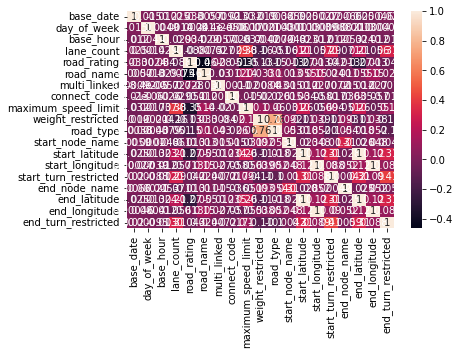

In [6]:
import seaborn as sns
import numpy as np
sns.heatmap(X_train.corr(),annot=True)